In [18]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import polars as pl
from sweep.experiment import Experiment, ExperimentType
from model.data import DataModel, KFeaturesDefinition, k_features_factory
from erm.problems.problems import ProblemType
from state_evolution.constants import SEProblemType
import subprocess
from experiments.data_loading import read_result_dataframe
import os
import matplotlib.pyplot as plt
import datetime
from matplotlib.lines import Line2D
from scipy.special import erfc

Define a datamodel

In [2]:
d = 1000

In [3]:
x_diagonal = KFeaturesDefinition(diagonal=[(0.5,d)])
θ_diagonal = KFeaturesDefinition(diagonal=[(2,d)])
ω_diagonal = KFeaturesDefinition(diagonal=[(1,d)])
δ_diagonal = KFeaturesDefinition(diagonal=[(1,d)])
ν_diagonal = KFeaturesDefinition(diagonal=[(1,d)])

low_low_kwargs = {
    "x_diagonal": x_diagonal,
    "θ_diagonal": θ_diagonal,
    "ω_diagonal": ω_diagonal,
    "δ_diagonal": δ_diagonal,
    "ν_diagonal": ν_diagonal,
}

low_robustness_low_usefulness = DataModel(
    d,
    normalize_matrices=False,
    data_model_factory=k_features_factory,
    factory_kwargs=low_low_kwargs,
    name="low_robustness_low_usefulness"
)


In [4]:
x_diagonal = KFeaturesDefinition(diagonal=[(0.5,d)])
θ_diagonal = KFeaturesDefinition(diagonal=[(8,d)])
ω_diagonal = KFeaturesDefinition(diagonal=[(1,d)])
δ_diagonal = KFeaturesDefinition(diagonal=[(1,d)])
ν_diagonal = KFeaturesDefinition(diagonal=[(1,d)])

low_high_kwargs = {
    "x_diagonal": x_diagonal,
    "θ_diagonal": θ_diagonal,
    "ω_diagonal": ω_diagonal,
    "δ_diagonal": δ_diagonal,
    "ν_diagonal": ν_diagonal,
}

low_robustness_high_usefulness = DataModel(
    d,
    normalize_matrices=False,
    data_model_factory=k_features_factory,
    factory_kwargs=low_high_kwargs,
    name="low_robustness_high_usefulness"
)


In [5]:
x_diagonal = KFeaturesDefinition(diagonal=[(2,d)])
θ_diagonal = KFeaturesDefinition(diagonal=[(0.5,d)])
ω_diagonal = KFeaturesDefinition(diagonal=[(1,d)])
δ_diagonal = KFeaturesDefinition(diagonal=[(1,d)])
ν_diagonal = KFeaturesDefinition(diagonal=[(1,d)])

high_low_kwargs = {
    "x_diagonal": x_diagonal,
    "θ_diagonal": θ_diagonal,
    "ω_diagonal": ω_diagonal,
    "δ_diagonal": δ_diagonal,
    "ν_diagonal": ν_diagonal,
}

high_robustness_low_usefulness = DataModel(
    d,
    normalize_matrices=False,
    data_model_factory=k_features_factory,
    factory_kwargs=high_low_kwargs,
    name="high_robustness_low_usefulness"
)


In [6]:
x_diagonal = KFeaturesDefinition(diagonal=[(2,d)])
θ_diagonal = KFeaturesDefinition(diagonal=[(2,d)])
ω_diagonal = KFeaturesDefinition(diagonal=[(1,d)])
δ_diagonal = KFeaturesDefinition(diagonal=[(1,d)])
ν_diagonal = KFeaturesDefinition(diagonal=[(1,d)])

high_high_kwargs = {
    "x_diagonal": x_diagonal,
    "θ_diagonal": θ_diagonal,
    "ω_diagonal": ω_diagonal,
    "δ_diagonal": δ_diagonal,
    "ν_diagonal": ν_diagonal,
}

high_robustness_high_usefulness = DataModel(
    d,
    normalize_matrices=False,
    data_model_factory=k_features_factory,
    factory_kwargs=high_high_kwargs,
    name="high_robustness_high_usefulness"
)


Define an experiment

In [7]:
experiment = Experiment(
    state_evolution_repetitions=1,
    erm_repetitions=2,
    alphas=np.logspace(-0.2,2,5),
    epsilons=np.array([0.0, 0.1, 0.2, 0.3]),#
    lambdas=np.array([0.001]),
    taus=np.array([0.05]),
    d=d,
    experiment_type=ExperimentType.Sweep,
    data_models = [low_robustness_low_usefulness, low_robustness_high_usefulness, high_robustness_low_usefulness, high_robustness_high_usefulness],
    test_against_epsilons=np.array([0.2]),
    erm_problem_type=ProblemType.LogisticFGM,
    se_problem_type=SEProblemType.LogisticFGM,
    gamma_fair_error=0.01,
    name="feature_combinations_fgm"
)
experiment_json = experiment.to_json()

In [8]:
venv_python = ".venv/bin/python"
command = ["mpiexec", "-n", "5", venv_python, "sweep/run_sweep.py", "--json", experiment_json, "--log-level", "INFO"]
subprocess.run(command)

INFO:root:The MPI comm size is 5
INFO:root:This process has rank 2
INFO:root:The MPI comm size is 5
INFO:root:This process has rank 3
INFO:root:The MPI comm size is 5
INFO:root:This process has rank 0
INFO:root:The MPI comm size is 5
INFO:root:This process has rank 1
INFO:root:The MPI comm size is 5
INFO:root:This process has rank 4
INFO:root:Starting Master for experiment feature_combinations_fgm
INFO:root:Starting Experiment feature_combinations_fgm
  0%|          | 0/240 [00:00<?, ?it/s]INFO:root:Starting all processes
INFO:root:Sending task 0 to 1
INFO:root:Sending task 1 to 2
INFO:root:Sending task 2 to 3
INFO:root:Sending task 3 to 4
INFO:root:All processes started - receiving results and sending new tasks
INFO:root:Received the 0th task
INFO:root:Starting task 1
INFO:root:Initializing data model
INFO:root:Starting task 2
INFO:root:Initializing data model
INFO:root:Starting task 3
INFO:root:Initializing data model
INFO:root:Starting task 4
INFO:root:Initializing data model


2025-03-04 21:44:15,907 - Rank 0 - INFO - The MPI comm size is 5
2025-03-04 21:44:15,907 - Rank 0 - INFO - This process has rank 0
2025-03-04 21:44:15,907 - Rank 0 - INFO - Starting Master for experiment feature_combinations_fgm
2025-03-04 21:44:15,908 - Rank 0 - INFO - Starting Experiment feature_combinations_fgm
2025-03-04 21:44:15,919 - Rank 0 - INFO - Starting all processes
2025-03-04 21:44:15,919 - Rank 0 - INFO - Sending task 0 to 1
2025-03-04 21:44:15,919 - Rank 0 - INFO - Sending task 1 to 2
2025-03-04 21:44:15,919 - Rank 0 - INFO - Sending task 2 to 3
2025-03-04 21:44:15,919 - Rank 0 - INFO - Sending task 3 to 4
2025-03-04 21:44:15,919 - Rank 0 - INFO - All processes started - receiving results and sending new tasks
2025-03-04 21:44:15,919 - Rank 0 - INFO - Received the 0th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν:

2025-03-04 21:44:23,604 - Rank 0 - INFO - Received task 1 from 1
2025-03-04 21:44:23,604 - Rank 0 - INFO - Saved Task(id=1, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec9f790>)
2025-03-04 21:44:23,605 - Rank 0 - INFO - Received the 1th task


INFO:root:Finished State Evolution Task(id=4, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Finished State Evolution Task(id=3, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=10

2025-03-04 21:44:24,067 - Rank 0 - INFO - Received task 2 from 2
2025-03-04 21:44:24,068 - Rank 0 - INFO - Saved Task(id=2, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec9fc10>)
2025-03-04 21:44:24,069 - Rank 0 - INFO - Received the 2th task


INFO:root:Received task 4 from 4
INFO:root:Saved Task(id=4, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14b0cc4d0>)
  1%|▏         | 3/240 [00:08<07:49,  1.98s/it]INFO:root:Received the 3th task
INFO:root:Starting task 7
INFO:root:Initializing data model


2025-03-04 21:44:24,320 - Rank 0 - INFO - Received task 4 from 4
2025-03-04 21:44:24,320 - Rank 0 - INFO - Saved Task(id=4, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14b0cc4d0>)
2025-03-04 21:44:24,321 - Rank 0 - INFO - Received the 3th task


INFO:root:Received task 3 from 3
INFO:root:Saved Task(id=3, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec90510>)
  2%|▏         | 4/240 [00:08<05:15,  1.34s/it]INFO:root:Received the 4th task
INFO:root:Starting task 8
INFO:root:Initializing data model


2025-03-04 21:44:24,668 - Rank 0 - INFO - Received task 3 from 3
2025-03-04 21:44:24,668 - Rank 0 - INFO - Saved Task(id=3, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec90510>)
2025-03-04 21:44:24,669 - Rank 0 - INFO - Received the 4th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000, 

2025-03-04 21:44:32,524 - Rank 0 - INFO - Received task 5 from 1
2025-03-04 21:44:32,524 - Rank 0 - INFO - Saved Task(id=5, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec90b10>)
2025-03-04 21:44:32,525 - Rank 0 - INFO - Received the 5th task


INFO:root:Finished State Evolution Task(id=7, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 7 from 4
INFO:root:Saved Task(id=7, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001,

2025-03-04 21:44:33,306 - Rank 0 - INFO - Received task 7 from 4
2025-03-04 21:44:33,307 - Rank 0 - INFO - Saved Task(id=7, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec91050>)
2025-03-04 21:44:33,308 - Rank 0 - INFO - Received the 6th task


INFO:root:Finished State Evolution Task(id=8, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Finished State Evolution Task(id=6, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=10

2025-03-04 21:44:33,834 - Rank 0 - INFO - Received task 8 from 3
2025-03-04 21:44:33,834 - Rank 0 - INFO - Saved Task(id=8, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec91550>)
2025-03-04 21:44:33,836 - Rank 0 - INFO - Received the 7th task
2025-03-04 21:44:33,939 - Rank 0 - INF

INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000, 

2025-03-04 21:44:41,537 - Rank 0 - INFO - Received task 9 from 1
2025-03-04 21:44:41,538 - Rank 0 - INFO - Saved Task(id=9, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec91f10>)
2025-03-04 21:44:41,595 - Rank 0 - INFO - Received the 9th task


INFO:root:Starting task 13
INFO:root:Initializing data model
INFO:root:Finished State Evolution Task(id=11, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)


2025-03-04 21:44:41,816 - Rank 0 - INFO - Received task 11 from 3
2025-03-04 21:44:41,816 - Rank 0 - INFO - Saved Task(id=11, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec92410>)
2025-03-04 21:44:41,818 - Rank 0 - INFO - Received the 10th task


INFO:root:Received task 11 from 3
INFO:root:Saved Task(id=11, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec92410>)
  4%|▍         | 10/240 [00:25<09:08,  2.38s/it]INFO:root:Received the 10th task
INFO:root:Starting task 14
INFO:root:Initializing data model
INFO:root:Finished St

2025-03-04 21:44:42,945 - Rank 0 - INFO - Received task 10 from 4
2025-03-04 21:44:42,946 - Rank 0 - INFO - Saved Task(id=10, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec927d0>)
2025-03-04 21:44:42,950 - Rank 0 - INFO - Received the 11th task


INFO:root:Received task 12 from 2
INFO:root:Saved Task(id=12, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec92d90>)
  5%|▌         | 12/240 [00:27<05:31,  1.46s/it]INFO:root:Received the 12th task
INFO:root:Starting task 16
INFO:root:Initializing data model


2025-03-04 21:44:43,156 - Rank 0 - INFO - Received task 12 from 2
2025-03-04 21:44:43,157 - Rank 0 - INFO - Saved Task(id=12, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec92d90>)
2025-03-04 21:44:43,158 - Rank 0 - INFO - Received the 12th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0.

2025-03-04 21:44:49,546 - Rank 0 - INFO - Received task 13 from 1
2025-03-04 21:44:49,559 - Rank 0 - INFO - Saved Task(id=13, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec93290>)
2025-03-04 21:44:49,561 - Rank 0 - INFO - Received the 13th task


INFO:root:Received task 14 from 3
INFO:root:Saved Task(id=14, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec936d0>)
  6%|▌         | 14/240 [00:33<08:10,  2.17s/it]INFO:root:Received the 14th task
INFO:root:Starting task 18
INFO:root:Initializing data model
INFO:root:Finished St

2025-03-04 21:44:49,917 - Rank 0 - INFO - Received task 14 from 3
2025-03-04 21:44:49,917 - Rank 0 - INFO - Saved Task(id=14, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec936d0>)
2025-03-04 21:44:49,918 - Rank 0 - INFO - Received the 14th task


INFO:root:Finished State Evolution Task(id=16, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 15 from 4
INFO:root:Saved Task(id=15, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.00

2025-03-04 21:44:50,316 - Rank 0 - INFO - Received task 15 from 4
2025-03-04 21:44:50,317 - Rank 0 - INFO - Saved Task(id=15, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec93c10>)
2025-03-04 21:44:50,319 - Rank 0 - INFO - Received the 15th task
2025-03-04 21:44:50,420 - Rank 0 -

INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0.

2025-03-04 21:44:57,452 - Rank 0 - INFO - Received task 17 from 1
2025-03-04 21:44:57,452 - Rank 0 - INFO - Saved Task(id=17, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ecdc650>)
2025-03-04 21:44:57,453 - Rank 0 - INFO - Received the 17th task


INFO:root:Finished State Evolution Task(id=18, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 18 from 3
INFO:root:Saved Task(id=18, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, 

2025-03-04 21:44:58,088 - Rank 0 - INFO - Received task 18 from 3
2025-03-04 21:44:58,088 - Rank 0 - INFO - Saved Task(id=18, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ecdcd10>)
2025-03-04 21:44:58,089 - Rank 0 - INFO - Received the 18th task


INFO:root:Finished State Evolution Task(id=20, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 20 from 2
INFO:root:Saved Task(id=20, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, t

2025-03-04 21:44:58,830 - Rank 0 - INFO - Received task 20 from 2
2025-03-04 21:44:58,830 - Rank 0 - INFO - Saved Task(id=20, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ecdd250>)
2025-03-04 21:44:58,831 - Rank 0 - INFO - Received the 19th task


INFO:root:Finished State Evolution Task(id=19, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 19 from 4
INFO:root:Saved Task(id=19, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, 

2025-03-04 21:44:59,321 - Rank 0 - INFO - Received task 19 from 4
2025-03-04 21:44:59,321 - Rank 0 - INFO - Saved Task(id=19, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ecdd7d0>)
2025-03-04 21:44:59,323 - Rank 0 - INFO - Received the 20th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000, 

2025-03-04 21:45:05,521 - Rank 0 - INFO - Received task 21 from 1
2025-03-04 21:45:05,521 - Rank 0 - INFO - Saved Task(id=21, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ecddcd0>)
2025-03-04 21:45:05,523 - Rank 0 - INFO - Received the 21th task


INFO:root:Finished State Evolution Task(id=22, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 22 from 3
INFO:root:Saved Task(id=22, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, 

2025-03-04 21:45:06,511 - Rank 0 - INFO - Received task 22 from 3
2025-03-04 21:45:06,512 - Rank 0 - INFO - Saved Task(id=22, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ecde1d0>)
2025-03-04 21:45:06,520 - Rank 0 - INFO - Received the 22th task


INFO:root:Finished State Evolution Task(id=23, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Finished State Evolution Task(id=24, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=100

2025-03-04 21:45:07,415 - Rank 0 - INFO - Received task 23 from 2
2025-03-04 21:45:07,415 - Rank 0 - INFO - Saved Task(id=23, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ecde6d0>)
2025-03-04 21:45:07,417 - Rank 0 - INFO - Received the 23th task
2025-03-04 21:45:07,591 - Rank 0 - I

INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000, 

2025-03-04 21:45:12,914 - Rank 0 - INFO - Received task 25 from 1
2025-03-04 21:45:12,914 - Rank 0 - INFO - Saved Task(id=25, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ecdf0d0>)
2025-03-04 21:45:12,916 - Rank 0 - INFO - Received the 25th task


INFO:root:Finished State Evolution Task(id=26, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 26 from 3
INFO:root:Saved Task(id=26, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, 

2025-03-04 21:45:14,264 - Rank 0 - INFO - Received task 26 from 3
2025-03-04 21:45:14,264 - Rank 0 - INFO - Saved Task(id=26, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec9f4d0>)
2025-03-04 21:45:14,266 - Rank 0 - INFO - Received the 26th task


INFO:root:Starting task 30
INFO:root:Initializing data model
INFO:root:Finished State Evolution Task(id=27, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Finished State Evolution Task(id=28, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon

2025-03-04 21:45:15,386 - Rank 0 - INFO - Received task 27 from 2
2025-03-04 21:45:15,386 - Rank 0 - INFO - Saved Task(id=27, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ecdfa10>)
2025-03-04 21:45:15,388 - Rank 0 - INFO - Received the 27th task
2025-03-04 21:45:15,684 - Rank 0 - I

INFO:root:Received task 28 from 4
INFO:root:Saved Task(id=28, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x13d3bfe10>)
 12%|█▏        | 28/240 [00:59<04:56,  1.40s/it]INFO:root:Received the 28th task
INFO:root:Starting task 32
INFO:root:Initializing data model
INFO:root:d: 1000
INFO:r

2025-03-04 21:45:21,966 - Rank 0 - INFO - Received task 30 from 3
2025-03-04 21:45:21,970 - Rank 0 - INFO - Saved Task(id=30, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec9f9d0>)
2025-03-04 21:45:21,976 - Rank 0 - INFO - Received the 29th task
2025-03-04 21:45:22,166 - Rank 0 - I

INFO:root:Starting task 34
INFO:root:Initializing data model
INFO:root:Finished State Evolution Task(id=32, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 32 from 4
INFO:root:Saved Task(id=32, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.238721138

2025-03-04 21:45:22,673 - Rank 0 - INFO - Received task 32 from 4
2025-03-04 21:45:22,674 - Rank 0 - INFO - Saved Task(id=32, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ecf0c10>)
2025-03-04 21:45:22,675 - Rank 0 - INFO - Received the 31th task


INFO:root:Finished State Evolution Task(id=29, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 29 from 1
INFO:root:Saved Task(id=29, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, t

2025-03-04 21:45:24,139 - Rank 0 - INFO - Received task 29 from 1
2025-03-04 21:45:24,139 - Rank 0 - INFO - Saved Task(id=29, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec91110>)
2025-03-04 21:45:24,140 - Rank 0 - INFO - Received the 32th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000, 

2025-03-04 21:45:30,513 - Rank 0 - INFO - Received task 33 from 3
2025-03-04 21:45:30,513 - Rank 0 - INFO - Saved Task(id=33, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec912d0>)
2025-03-04 21:45:30,515 - Rank 0 - INFO - Received the 33th task
2025-03-04 21:45:30,704 - Rank 0 - I

INFO:root:Received task 34 from 2
INFO:root:Saved Task(id=34, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec90c10>)
 14%|█▍        | 34/240 [01:14<07:24,  2.16s/it]INFO:root:Received the 34th task
INFO:root:Starting task 38
INFO:root:Initializing data model
INFO:root:Finished Sta

2025-03-04 21:45:31,192 - Rank 0 - INFO - Received task 35 from 4
2025-03-04 21:45:31,192 - Rank 0 - INFO - Saved Task(id=35, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ecf1a90>)
2025-03-04 21:45:31,194 - Rank 0 - INFO - Received the 35th task


INFO:root:Finished State Evolution Task(id=36, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 36 from 1
INFO:root:Saved Task(id=36, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001,

2025-03-04 21:45:32,400 - Rank 0 - INFO - Received task 36 from 1
2025-03-04 21:45:32,400 - Rank 0 - INFO - Saved Task(id=36, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec92110>)
2025-03-04 21:45:32,402 - Rank 0 - INFO - Received the 36th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000, 

2025-03-04 21:45:40,668 - Rank 0 - INFO - Received task 37 from 3
2025-03-04 21:45:40,668 - Rank 0 - INFO - Saved Task(id=37, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ecf2550>)
2025-03-04 21:45:40,670 - Rank 0 - INFO - Received the 37th task


INFO:root:iter_nb: 500, err: 0.0003261264308775935
INFO:root:error: 0.0003261264308775935
INFO:root:Finished State Evolution Task(id=38, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 38 from 2
INFO:root:Saved Task(id=38, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.Log

2025-03-04 21:45:41,807 - Rank 0 - INFO - Received task 38 from 2
2025-03-04 21:45:41,807 - Rank 0 - INFO - Saved Task(id=38, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec92810>)
2025-03-04 21:45:41,809 - Rank 0 - INFO - Received the 38th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000, 

2025-03-04 21:45:45,441 - Rank 0 - INFO - Received task 40 from 1
2025-03-04 21:45:45,441 - Rank 0 - INFO - Saved Task(id=40, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec92190>)
2025-03-04 21:45:45,443 - Rank 0 - INFO - Received the 39th task
2025-03-04 21:45:45,525 - Rank 0 - I

INFO:root:Received task 39 from 4
INFO:root:Saved Task(id=39, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ecf2e90>)
INFO:root:Received the 40th task
INFO:root:Starting task 44
INFO:root:Initializing data model
INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio 

2025-03-04 21:45:49,093 - Rank 0 - INFO - Received task 41 from 3
2025-03-04 21:45:49,093 - Rank 0 - INFO - Saved Task(id=41, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14eca3350>)
2025-03-04 21:45:49,094 - Rank 0 - INFO - Received the 41th task


INFO:root:Finished State Evolution Task(id=42, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 42 from 2
INFO:root:Saved Task(id=42, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001

2025-03-04 21:45:51,198 - Rank 0 - INFO - Received task 42 from 2
2025-03-04 21:45:51,198 - Rank 0 - INFO - Saved Task(id=42, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ecf36d0>)
2025-03-04 21:45:51,199 - Rank 0 - INFO - Received the 42th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000, 

2025-03-04 21:45:53,965 - Rank 0 - INFO - Received task 45 from 3
2025-03-04 21:45:53,965 - Rank 0 - INFO - Saved Task(id=45, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec93c50>)
2025-03-04 21:45:53,966 - Rank 0 - INFO - Received the 43th task


INFO:root:Finished State Evolution Task(id=46, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 46 from 2
INFO:root:Saved Task(id=46, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001

2025-03-04 21:45:55,338 - Rank 0 - INFO - Received task 46 from 2
2025-03-04 21:45:55,338 - Rank 0 - INFO - Saved Task(id=46, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ecf3e90>)
2025-03-04 21:45:55,339 - Rank 0 - INFO - Received the 44th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 21:46:02,400 - Rank 0 - INFO - Received task 47 from 3
2025-03-04 21:46:02,400 - Rank 0 - INFO - Saved Task(id=47, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ecf2a10>)
2025-03-04 21:46:02,401 - Rank 0 - INFO - Received the 45th task


INFO:root:iter_nb: 500, err: 1.5926601506066618e-05
INFO:root:error: 1.5926601506066618e-05
INFO:root:Finished State Evolution Task(id=48, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 48 from 2
INFO:root:Saved Task(id=48, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.Lo

2025-03-04 21:46:04,585 - Rank 0 - INFO - Received task 48 from 2
2025-03-04 21:46:04,585 - Rank 0 - INFO - Saved Task(id=48, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ecdf690>)
2025-03-04 21:46:04,586 - Rank 0 - INFO - Received the 46th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000, 

2025-03-04 21:46:07,305 - Rank 0 - INFO - Received task 43 from 1
2025-03-04 21:46:07,306 - Rank 0 - INFO - Saved Task(id=43, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec90bd0>)
2025-03-04 21:46:07,307 - Rank 0 - INFO - Received the 47th task


INFO:root:Finished State Evolution Task(id=44, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 44 from 4
INFO:root:Saved Task(id=44, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001,

2025-03-04 21:46:09,344 - Rank 0 - INFO - Received task 44 from 4
2025-03-04 21:46:09,344 - Rank 0 - INFO - Saved Task(id=44, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ecdf710>)
2025-03-04 21:46:09,346 - Rank 0 - INFO - Received the 48th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 21:46:16,239 - Rank 0 - INFO - Received task 49 from 3
2025-03-04 21:46:16,239 - Rank 0 - INFO - Saved Task(id=49, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ee612d0>)
2025-03-04 21:46:16,240 - Rank 0 - INFO - Received the 49th task


INFO:root:Finished State Evolution Task(id=50, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 50 from 2
INFO:root:Saved Task(id=50, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001

2025-03-04 21:46:18,489 - Rank 0 - INFO - Received task 50 from 2
2025-03-04 21:46:18,489 - Rank 0 - INFO - Saved Task(id=50, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ecf1490>)
2025-03-04 21:46:18,490 - Rank 0 - INFO - Received the 50th task


INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000,   1000]))
INFO:root:Σ_ω value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_δ value counts: (

2025-03-04 21:46:26,664 - Rank 0 - INFO - Received task 53 from 3
2025-03-04 21:46:26,664 - Rank 0 - INFO - Saved Task(id=53, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ee61690>)
2025-03-04 21:46:26,666 - Rank 0 - INFO - Received the 51th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 21:46:29,302 - Rank 0 - INFO - Received task 54 from 2
2025-03-04 21:46:29,302 - Rank 0 - INFO - Saved Task(id=54, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ee61e10>)
2025-03-04 21:46:29,305 - Rank 0 - INFO - Received the 52th task


INFO:root:Finished State Evolution Task(id=52, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 52 from 4
INFO:root:Saved Task(id=52, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001,

2025-03-04 21:46:30,577 - Rank 0 - INFO - Received task 52 from 4
2025-03-04 21:46:30,578 - Rank 0 - INFO - Saved Task(id=52, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ecf2210>)
2025-03-04 21:46:30,579 - Rank 0 - INFO - Received the 53th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 21:46:32,761 - Rank 0 - INFO - Received task 51 from 1
2025-03-04 21:46:32,761 - Rank 0 - INFO - Saved Task(id=51, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ee62610>)
2025-03-04 21:46:32,768 - Rank 0 - INFO - Received the 54th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000, 

2025-03-04 21:46:37,314 - Rank 0 - INFO - Received task 57 from 4
2025-03-04 21:46:37,314 - Rank 0 - INFO - Saved Task(id=57, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec92a50>)
2025-03-04 21:46:37,317 - Rank 0 - INFO - Received the 55th task


INFO:root:iter_nb: 500, err: 0.0809704455060114
INFO:root:error: 0.0809704455060114
INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x 

2025-03-04 21:46:39,222 - Rank 0 - INFO - Received task 58 from 1
2025-03-04 21:46:39,222 - Rank 0 - INFO - Saved Task(id=58, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec92e10>)
2025-03-04 21:46:39,224 - Rank 0 - INFO - Received the 56th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 21:46:47,482 - Rank 0 - INFO - Received task 59 from 4
2025-03-04 21:46:47,482 - Rank 0 - INFO - Saved Task(id=59, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec93190>)
2025-03-04 21:46:47,484 - Rank 0 - INFO - Received the 57th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000, 

2025-03-04 21:46:51,745 - Rank 0 - INFO - Received task 60 from 1
2025-03-04 21:46:51,745 - Rank 0 - INFO - Saved Task(id=60, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ecf2e90>)
2025-03-04 21:46:51,747 - Rank 0 - INFO - Received the 58th task


INFO:root:Finished State Evolution Task(id=61, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 61 from 4
INFO:root:Saved Task(id=61, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001,

2025-03-04 21:46:52,168 - Rank 0 - INFO - Received task 61 from 4
2025-03-04 21:46:52,168 - Rank 0 - INFO - Saved Task(id=61, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ecf3910>)
2025-03-04 21:46:52,169 - Rank 0 - INFO - Received the 59th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000, 

2025-03-04 21:46:57,222 - Rank 0 - INFO - Received task 62 from 1
2025-03-04 21:46:57,222 - Rank 0 - INFO - Saved Task(id=62, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ee63cd0>)
2025-03-04 21:46:57,224 - Rank 0 - INFO - Received the 60th task


INFO:root:iter_nb: 1500, err: 0.0008604035456869497
INFO:root:error: 0.0008604035456869497
INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:ro

2025-03-04 21:47:00,956 - Rank 0 - INFO - Received task 55 from 3
2025-03-04 21:47:00,956 - Rank 0 - INFO - Saved Task(id=55, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ecf3fd0>)
2025-03-04 21:47:00,958 - Rank 0 - INFO - Received the 61th task


INFO:root:Finished State Evolution Task(id=63, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 63 from 4
INFO:root:Saved Task(id=63, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001

2025-03-04 21:47:01,414 - Rank 0 - INFO - Received task 63 from 4
2025-03-04 21:47:01,414 - Rank 0 - INFO - Saved Task(id=63, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec932d0>)
2025-03-04 21:47:01,416 - Rank 0 - INFO - Received the 62th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000, 

2025-03-04 21:47:06,365 - Rank 0 - INFO - Received task 64 from 1
2025-03-04 21:47:06,365 - Rank 0 - INFO - Saved Task(id=64, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec93c90>)
2025-03-04 21:47:06,366 - Rank 0 - INFO - Received the 63th task


INFO:root:iter_nb: 2000, err: 5.7486748971768975e-05
INFO:root:error: 5.7486748971768975e-05
INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:

2025-03-04 21:47:12,666 - Rank 0 - INFO - Received task 56 from 2
2025-03-04 21:47:12,666 - Rank 0 - INFO - Saved Task(id=56, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ee63990>)
2025-03-04 21:47:12,668 - Rank 0 - INFO - Received the 64th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 21:47:26,875 - Rank 0 - INFO - Received task 65 from 3
2025-03-04 21:47:26,875 - Rank 0 - INFO - Saved Task(id=65, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ecdf710>)
2025-03-04 21:47:26,876 - Rank 0 - INFO - Received the 65th task


INFO:root:iter_nb: 1500, err: 0.25461790812096297
INFO:root:error: 0.25461790812096297
INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [

2025-03-04 21:47:32,925 - Rank 0 - INFO - Received task 66 from 4
2025-03-04 21:47:32,925 - Rank 0 - INFO - Saved Task(id=66, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ee79010>)
2025-03-04 21:47:32,926 - Rank 0 - INFO - Received the 66th task


INFO:root:iter_nb: 3000, err: 0.0006674768583252444
INFO:root:error: 0.0006674768583252444
INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.

2025-03-04 21:47:38,212 - Rank 0 - INFO - Received task 69 from 3
2025-03-04 21:47:38,212 - Rank 0 - INFO - Saved Task(id=69, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ee79290>)
2025-03-04 21:47:38,213 - Rank 0 - INFO - Received the 67th task


INFO:root:iter_nb: 2500, err: 0.028971151522000582
INFO:root:error: 0.028971151522000582
INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:iter_nb: 3500, err: 0.00015494649233005475
INFO:root:error: 0.00015494649233005475
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0

2025-03-04 21:47:45,129 - Rank 0 - INFO - Received task 70 from 4
2025-03-04 21:47:45,130 - Rank 0 - INFO - Saved Task(id=70, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ee799d0>)
2025-03-04 21:47:45,131 - Rank 0 - INFO - Received the 68th task


INFO:root:iter_nb: 500, err: 0.057313822410549164
INFO:root:error: 0.057313822410549164
INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:

2025-03-04 21:47:49,774 - Rank 0 - INFO - Received task 67 from 1
2025-03-04 21:47:49,774 - Rank 0 - INFO - Saved Task(id=67, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ee79d90>)
2025-03-04 21:47:49,776 - Rank 0 - INFO - Received the 69th task


INFO:root:iter_nb: 3500, err: 0.00321452916796261
INFO:root:error: 0.00321452916796261
INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [

2025-03-04 21:47:54,558 - Rank 0 - INFO - Received task 73 from 1
2025-03-04 21:47:54,559 - Rank 0 - INFO - Saved Task(id=73, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ee7a1d0>)
2025-03-04 21:47:54,560 - Rank 0 - INFO - Received the 70th task


INFO:root:iter_nb: 500, err: 0.1601232386865945
INFO:root:error: 0.1601232386865945
INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 

2025-03-04 21:47:59,270 - Rank 0 - INFO - Received task 74 from 1
2025-03-04 21:47:59,270 - Rank 0 - INFO - Saved Task(id=74, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ee7a490>)
2025-03-04 21:47:59,272 - Rank 0 - INFO - Received the 71th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 21:48:04,747 - Rank 0 - INFO - Received task 71 from 3
2025-03-04 21:48:04,747 - Rank 0 - INFO - Saved Task(id=71, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ee7a8d0>)
2025-03-04 21:48:04,748 - Rank 0 - INFO - Received the 72th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 21:48:09,606 - Rank 0 - INFO - Received task 75 from 1
2025-03-04 21:48:09,615 - Rank 0 - INFO - Saved Task(id=75, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ee7ac90>)
2025-03-04 21:48:09,618 - Rank 0 - INFO - Received the 73th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000, 

2025-03-04 21:48:13,111 - Rank 0 - INFO - Received task 77 from 1
2025-03-04 21:48:13,111 - Rank 0 - INFO - Saved Task(id=77, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec930d0>)
2025-03-04 21:48:13,112 - Rank 0 - INFO - Received the 74th task


INFO:root:iter_nb: 5500, err: 3.9342863146885065e-05
INFO:root:error: 3.9342863146885065e-05
INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 

2025-03-04 21:48:16,388 - Rank 0 - INFO - Received task 78 from 1
2025-03-04 21:48:16,388 - Rank 0 - INFO - Saved Task(id=78, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14e35b390>)
2025-03-04 21:48:16,389 - Rank 0 - INFO - Received the 75th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 21:48:20,204 - Rank 0 - INFO - Received task 76 from 3
2025-03-04 21:48:20,204 - Rank 0 - INFO - Saved Task(id=76, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ee7b790>)
2025-03-04 21:48:20,205 - Rank 0 - INFO - Received the 76th task


INFO:root:iter_nb: 6000, err: 1.3084666534268763e-05
INFO:root:error: 1.3084666534268763e-05
INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:

2025-03-04 21:48:23,035 - Rank 0 - INFO - Received task 68 from 2
2025-03-04 21:48:23,035 - Rank 0 - INFO - Saved Task(id=68, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ecf3c50>)
2025-03-04 21:48:23,036 - Rank 0 - INFO - Received the 77th task


INFO:root:Finished State Evolution Task(id=79, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 79 from 1
INFO:root:Saved Task(id=79, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data

2025-03-04 21:48:24,203 - Rank 0 - INFO - Received task 79 from 1
2025-03-04 21:48:24,203 - Rank 0 - INFO - Saved Task(id=79, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ec93f50>)
2025-03-04 21:48:24,205 - Rank 0 - INFO - Received the 78th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000, 

2025-03-04 21:48:32,135 - Rank 0 - INFO - Received task 80 from 3
2025-03-04 21:48:32,135 - Rank 0 - INFO - Saved Task(id=80, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14e35b390>)
2025-03-04 21:48:32,137 - Rank 0 - INFO - Received the 79th task


INFO:root:Finished State Evolution Task(id=72, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 72 from 4
INFO:root:Saved Task(id=72, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_

2025-03-04 21:48:35,666 - Rank 0 - INFO - Received task 72 from 4
2025-03-04 21:48:35,666 - Rank 0 - INFO - Saved Task(id=72, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14ee7a690>)
2025-03-04 21:48:35,668 - Rank 0 - INFO - Received the 80th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 21:48:37,759 - Rank 0 - INFO - Received task 81 from 2
2025-03-04 21:48:37,762 - Rank 0 - INFO - Saved Task(id=81, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ee98a50>)
2025-03-04 21:48:37,764 - Rank 0 - INFO - Received the 81th task


INFO:root:Finished ERM Task(id=82, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 82 from 1
INFO:root:Saved Task(id=82, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.0, 

2025-03-04 21:48:39,991 - Rank 0 - INFO - Received task 82 from 1
2025-03-04 21:48:39,991 - Rank 0 - INFO - Saved Task(id=82, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec90590>)
2025-03-04 21:48:39,992 - Rank 0 - INFO - Received the 82th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 21:48:56,737 - Rank 0 - INFO - Received task 83 from 3
2025-03-04 21:48:56,737 - Rank 0 - INFO - Saved Task(id=83, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ee98dd0>)
2025-03-04 21:48:56,738 - Rank 0 - INFO - Received the 83th task


INFO:root:Finished ERM Task(id=84, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 84 from 4
INFO:root:Saved Task(id=84, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.0, t

2025-03-04 21:49:02,004 - Rank 0 - INFO - Received task 84 from 4
2025-03-04 21:49:02,004 - Rank 0 - INFO - Saved Task(id=84, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec91090>)
2025-03-04 21:49:02,005 - Rank 0 - INFO - Received the 84th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Finished ERM Task(id=85, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logi

2025-03-04 21:49:02,933 - Rank 0 - INFO - Received task 85 from 2
2025-03-04 21:49:02,933 - Rank 0 - INFO - Saved Task(id=85, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ee99490>)
2025-03-04 21:49:02,945 - Rank 0 - INFO - Received the 85th task


INFO:root:Finished ERM Task(id=86, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 86 from 1
INFO:root:Saved Task(id=86, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.1, 

2025-03-04 21:49:04,683 - Rank 0 - INFO - Received task 86 from 1
2025-03-04 21:49:04,683 - Rank 0 - INFO - Saved Task(id=86, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14cf69750>)
2025-03-04 21:49:04,684 - Rank 0 - INFO - Received the 86th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 21:49:22,742 - Rank 0 - INFO - Received task 87 from 3
2025-03-04 21:49:22,742 - Rank 0 - INFO - Saved Task(id=87, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ee79150>)
2025-03-04 21:49:22,743 - Rank 0 - INFO - Received the 87th task


INFO:root:Finished ERM Task(id=88, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)


2025-03-04 21:49:26,519 - Rank 0 - INFO - Received task 88 from 4
2025-03-04 21:49:26,520 - Rank 0 - INFO - Saved Task(id=88, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecf1bd0>)
2025-03-04 21:49:26,520 - Rank 0 - INFO - Received the 88th task


INFO:root:Received task 88 from 4
INFO:root:Saved Task(id=88, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecf1bd0>)
 37%|███▋      | 88/240 [05:10<17:24,  6.87s/it]INFO:root:Received the 88th task
INFO:root:Starting task 92
INFO:root:Initializing data model
INFO:root:

2025-03-04 21:49:27,554 - Rank 0 - INFO - Received task 89 from 2
2025-03-04 21:49:27,554 - Rank 0 - INFO - Saved Task(id=89, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecf1c90>)
2025-03-04 21:49:27,555 - Rank 0 - INFO - Received the 89th task


INFO:root:Finished ERM Task(id=90, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 90 from 1
INFO:root:Saved Task(id=90, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.2, 

2025-03-04 21:49:28,173 - Rank 0 - INFO - Received task 90 from 1
2025-03-04 21:49:28,173 - Rank 0 - INFO - Saved Task(id=90, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec90dd0>)
2025-03-04 21:49:28,174 - Rank 0 - INFO - Received the 90th task


INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:

2025-03-04 21:49:59,627 - Rank 0 - INFO - Received task 91 from 3
2025-03-04 21:49:59,627 - Rank 0 - INFO - Saved Task(id=91, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ee9a350>)
2025-03-04 21:49:59,630 - Rank 0 - INFO - Received the 91th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Finished ERM Task(id=92, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:roo

2025-03-04 21:50:06,679 - Rank 0 - INFO - Received task 92 from 4
2025-03-04 21:50:06,679 - Rank 0 - INFO - Saved Task(id=92, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec92410>)
2025-03-04 21:50:06,680 - Rank 0 - INFO - Received the 92th task


INFO:root:Finished ERM Task(id=93, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 93 from 2
INFO:root:Saved Task(id=93, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, t

2025-03-04 21:50:08,012 - Rank 0 - INFO - Received task 93 from 2
2025-03-04 21:50:08,026 - Rank 0 - INFO - Saved Task(id=93, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ee7a8d0>)
2025-03-04 21:50:08,027 - Rank 0 - INFO - Received the 93th task


INFO:root:Finished ERM Task(id=94, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 94 from 1
INFO:root:Saved Task(id=94, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, 

2025-03-04 21:50:09,130 - Rank 0 - INFO - Received task 94 from 1
2025-03-04 21:50:09,130 - Rank 0 - INFO - Saved Task(id=94, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec92d90>)
2025-03-04 21:50:09,131 - Rank 0 - INFO - Received the 94th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 21:50:28,928 - Rank 0 - INFO - Received task 95 from 3
2025-03-04 21:50:28,928 - Rank 0 - INFO - Saved Task(id=95, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec91090>)
2025-03-04 21:50:28,929 - Rank 0 - INFO - Received the 95th task


INFO:root:Finished ERM Task(id=96, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 96 from 4
INFO:root:Saved Task(id=96, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, t

2025-03-04 21:50:38,783 - Rank 0 - INFO - Received task 96 from 4
2025-03-04 21:50:38,783 - Rank 0 - INFO - Saved Task(id=96, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ee9b210>)
2025-03-04 21:50:38,784 - Rank 0 - INFO - Received the 96th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 21:50:45,652 - Rank 0 - INFO - Received task 97 from 2
2025-03-04 21:50:45,653 - Rank 0 - INFO - Saved Task(id=97, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ee9b590>)
2025-03-04 21:50:45,654 - Rank 0 - INFO - Received the 97th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 21:50:48,541 - Rank 0 - INFO - Received task 98 from 1
2025-03-04 21:50:48,541 - Rank 0 - INFO - Saved Task(id=98, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecf3910>)
2025-03-04 21:50:48,542 - Rank 0 - INFO - Received the 98th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000, 

2025-03-04 21:51:18,567 - Rank 0 - INFO - Received task 99 from 3
2025-03-04 21:51:18,567 - Rank 0 - INFO - Saved Task(id=99, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eca3b10>)
2025-03-04 21:51:18,569 - Rank 0 - INFO - Received the 99th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 21:51:26,806 - Rank 0 - INFO - Received task 100 from 4
2025-03-04 21:51:26,807 - Rank 0 - INFO - Saved Task(id=100, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ee7bf10>)
2025-03-04 21:51:26,808 - Rank 0 - INFO - Received the 100th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 21:51:34,773 - Rank 0 - INFO - Received task 101 from 2
2025-03-04 21:51:34,773 - Rank 0 - INFO - Saved Task(id=101, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ee63cd0>)
2025-03-04 21:51:34,774 - Rank 0 - INFO - Received the 101th task


INFO:root:Finished ERM Task(id=102, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 102 from 1
INFO:root:Saved Task(id=102, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.1, t

2025-03-04 21:51:39,472 - Rank 0 - INFO - Received task 102 from 1
2025-03-04 21:51:39,472 - Rank 0 - INFO - Saved Task(id=102, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec9f7d0>)
2025-03-04 21:51:39,473 - Rank 0 - INFO - Received the 102th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000, 

2025-03-04 21:52:04,599 - Rank 0 - INFO - Received task 103 from 3
2025-03-04 21:52:04,606 - Rank 0 - INFO - Saved Task(id=103, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecdc6d0>)
2025-03-04 21:52:04,608 - Rank 0 - INFO - Received the 103th task


INFO:root:Finished ERM Task(id=104, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Received task 104 from 4
INFO:root:Saved Task(id=104, task_type=<TaskType.ERM: 0>, erm_problem_type=<Proble

2025-03-04 21:52:17,731 - Rank 0 - INFO - Received task 104 from 4
2025-03-04 21:52:17,731 - Rank 0 - INFO - Saved Task(id=104, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecdc790>)
2025-03-04 21:52:17,732 - Rank 0 - INFO - Received the 104th task


INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_δ value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_ν value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:ρ: 1.0
INFO:root:Σ_δ eigenvalues: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.

2025-03-04 21:52:28,748 - Rank 0 - INFO - Received task 105 from 2
2025-03-04 21:52:28,748 - Rank 0 - INFO - Saved Task(id=105, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eebcc90>)
2025-03-04 21:52:28,749 - Rank 0 - INFO - Received the 105th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 21:52:32,062 - Rank 0 - INFO - Received task 106 from 1
2025-03-04 21:52:32,062 - Rank 0 - INFO - Saved Task(id=106, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eebd010>)
2025-03-04 21:52:32,063 - Rank 0 - INFO - Received the 106th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000, 

2025-03-04 21:52:59,650 - Rank 0 - INFO - Received task 107 from 3
2025-03-04 21:52:59,650 - Rank 0 - INFO - Saved Task(id=107, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eebd310>)
2025-03-04 21:52:59,652 - Rank 0 - INFO - Received the 107th task


INFO:root:Finished ERM Task(id=109, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 109 from 2
INFO:root:Saved Task(id=109, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, te

2025-03-04 21:53:01,387 - Rank 0 - INFO - Received task 109 from 2
2025-03-04 21:53:01,387 - Rank 0 - INFO - Saved Task(id=109, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eebd610>)
2025-03-04 21:53:01,388 - Rank 0 - INFO - Received the 108th task


INFO:root:Finished ERM Task(id=110, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 110 from 1
INFO:root:Saved Task(id=110, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, t

2025-03-04 21:53:02,763 - Rank 0 - INFO - Received task 110 from 1
2025-03-04 21:53:02,763 - Rank 0 - INFO - Saved Task(id=110, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eebd850>)
2025-03-04 21:53:02,764 - Rank 0 - INFO - Received the 109th task


INFO:root:Starting task 113
INFO:root:Initializing data model
INFO:root:Finished ERM Task(id=108, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 108 from 4
INFO:root:Saved Task(id=108, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProble

2025-03-04 21:53:07,085 - Rank 0 - INFO - Received task 108 from 4
2025-03-04 21:53:07,085 - Rank 0 - INFO - Saved Task(id=108, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecddd10>)
2025-03-04 21:53:07,086 - Rank 0 - INFO - Received the 110th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 21:53:41,380 - Rank 0 - INFO - Received task 113 from 1
2025-03-04 21:53:41,380 - Rank 0 - INFO - Saved Task(id=113, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecdd990>)
2025-03-04 21:53:41,381 - Rank 0 - INFO - Received the 111th task


INFO:root:Finished ERM Task(id=114, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 114 from 4
INFO:root:Saved Task(id=114, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.0,

2025-03-04 21:53:46,505 - Rank 0 - INFO - Received task 114 from 4
2025-03-04 21:53:46,505 - Rank 0 - INFO - Saved Task(id=114, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eebe0d0>)
2025-03-04 21:53:46,506 - Rank 0 - INFO - Received the 112th task


INFO:root:Finished ERM Task(id=111, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 111 from 3
INFO:root:Saved Task(id=111, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, t

2025-03-04 21:53:47,871 - Rank 0 - INFO - Received task 111 from 3
2025-03-04 21:53:47,871 - Rank 0 - INFO - Saved Task(id=111, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecdd850>)
2025-03-04 21:53:47,872 - Rank 0 - INFO - Received the 113th task


INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_δ value counts: (array([0., 1.]), array([999000,   100

2025-03-04 21:53:49,056 - Rank 0 - INFO - Received task 112 from 2
2025-03-04 21:53:49,061 - Rank 0 - INFO - Saved Task(id=112, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eebe810>)
2025-03-04 21:53:49,096 - Rank 0 - INFO - Received the 114th task


INFO:root:Received the 114th task
INFO:root:Starting task 118
INFO:root:Initializing data model
INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
IN

2025-03-04 21:54:22,887 - Rank 0 - INFO - Received task 117 from 3
2025-03-04 21:54:22,889 - Rank 0 - INFO - Saved Task(id=117, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec9ea50>)
2025-03-04 21:54:22,891 - Rank 0 - INFO - Received the 115th task


INFO:root:Received task 117 from 3
INFO:root:Saved Task(id=117, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec9ea50>)
 48%|████▊     | 115/240 [10:06<30:48, 14.79s/it]INFO:root:Received the 115th task
INFO:root:Starting task 119
INFO:root:Initializing data model
INFO:r

2025-03-04 21:54:23,500 - Rank 0 - INFO - Received task 118 from 2
2025-03-04 21:54:23,501 - Rank 0 - INFO - Saved Task(id=118, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eebed10>)
2025-03-04 21:54:23,502 - Rank 0 - INFO - Received the 116th task


INFO:root:Finished ERM Task(id=115, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)


2025-03-04 21:54:25,371 - Rank 0 - INFO - Received task 115 from 1
2025-03-04 21:54:25,371 - Rank 0 - INFO - Saved Task(id=115, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec9f110>)
2025-03-04 21:54:25,374 - Rank 0 - INFO - Received the 117th task


INFO:root:Received task 115 from 1
INFO:root:Saved Task(id=115, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec9f110>)
 49%|████▉     | 117/240 [10:09<16:16,  7.94s/it]INFO:root:Received the 117th task
INFO:root:Starting task 121
INFO:root:Initializing data model
INFO:

2025-03-04 21:54:28,792 - Rank 0 - INFO - Received task 116 from 4
2025-03-04 21:54:28,792 - Rank 0 - INFO - Saved Task(id=116, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec9f3d0>)
2025-03-04 21:54:28,795 - Rank 0 - INFO - Received the 118th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 21:55:03,803 - Rank 0 - INFO - Received task 121 from 1
2025-03-04 21:55:03,804 - Rank 0 - INFO - Saved Task(id=121, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec9ead0>)
2025-03-04 21:55:03,806 - Rank 0 - INFO - Received the 119th task


INFO:root:Finished ERM Task(id=122, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 122 from 4
INFO:root:Saved Task(id=122, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2,

2025-03-04 21:55:07,067 - Rank 0 - INFO - Received task 122 from 4
2025-03-04 21:55:07,067 - Rank 0 - INFO - Saved Task(id=122, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecdf7d0>)
2025-03-04 21:55:07,068 - Rank 0 - INFO - Received the 120th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 21:55:13,394 - Rank 0 - INFO - Received task 119 from 3
2025-03-04 21:55:13,394 - Rank 0 - INFO - Saved Task(id=119, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eebd850>)
2025-03-04 21:55:13,395 - Rank 0 - INFO - Received the 121th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 21:55:17,116 - Rank 0 - INFO - Received task 120 from 2
2025-03-04 21:55:17,116 - Rank 0 - INFO - Saved Task(id=120, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec9ea50>)
2025-03-04 21:55:17,117 - Rank 0 - INFO - Received the 122th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000, 

2025-03-04 21:55:43,326 - Rank 0 - INFO - Received task 123 from 1
2025-03-04 21:55:43,326 - Rank 0 - INFO - Saved Task(id=123, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eed4150>)
2025-03-04 21:55:43,328 - Rank 0 - INFO - Received the 123th task


INFO:root:Finished ERM Task(id=124, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 124 from 4
INFO:root:Saved Task(id=124, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, 

2025-03-04 21:55:45,392 - Rank 0 - INFO - Received task 124 from 4
2025-03-04 21:55:45,393 - Rank 0 - INFO - Saved Task(id=124, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec9f3d0>)
2025-03-04 21:55:45,395 - Rank 0 - INFO - Received the 124th task


INFO:root:Finished ERM Task(id=125, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 125 from 3
INFO:root:Saved Task(id=125, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3, 

2025-03-04 21:55:46,181 - Rank 0 - INFO - Received task 125 from 3
2025-03-04 21:55:46,181 - Rank 0 - INFO - Saved Task(id=125, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eebc710>)
2025-03-04 21:55:46,182 - Rank 0 - INFO - Received the 125th task


INFO:root:Finished ERM Task(id=126, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 126 from 2
INFO:root:Saved Task(id=126, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3,

2025-03-04 21:55:50,423 - Rank 0 - INFO - Received task 126 from 2
2025-03-04 21:55:50,423 - Rank 0 - INFO - Saved Task(id=126, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecdc750>)
2025-03-04 21:55:50,425 - Rank 0 - INFO - Received the 126th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 21:56:20,698 - Rank 0 - INFO - Received task 127 from 1
2025-03-04 21:56:20,699 - Rank 0 - INFO - Saved Task(id=127, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eebccd0>)
2025-03-04 21:56:20,711 - Rank 0 - INFO - Received the 127th task


INFO:root:Finished ERM Task(id=128, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 128 from 4
INFO:root:Saved Task(id=128, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3, 

2025-03-04 21:56:22,525 - Rank 0 - INFO - Received task 128 from 4
2025-03-04 21:56:22,526 - Rank 0 - INFO - Saved Task(id=128, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecdcfd0>)
2025-03-04 21:56:22,529 - Rank 0 - INFO - Received the 128th task


INFO:root:Finished ERM Task(id=129, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 129 from 3
INFO:root:Saved Task(id=129, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, 

2025-03-04 21:56:29,951 - Rank 0 - INFO - Received task 129 from 3
2025-03-04 21:56:29,951 - Rank 0 - INFO - Saved Task(id=129, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecdc710>)
2025-03-04 21:56:29,952 - Rank 0 - INFO - Received the 129th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 21:56:36,086 - Rank 0 - INFO - Received task 130 from 2
2025-03-04 21:56:36,086 - Rank 0 - INFO - Saved Task(id=130, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecdc750>)
2025-03-04 21:56:36,088 - Rank 0 - INFO - Received the 130th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000, 

2025-03-04 21:57:09,356 - Rank 0 - INFO - Received task 133 from 3
2025-03-04 21:57:09,358 - Rank 0 - INFO - Saved Task(id=133, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eed5750>)
2025-03-04 21:57:09,360 - Rank 0 - INFO - Received the 131th task


INFO:root:Finished ERM Task(id=131, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 131 from 1
INFO:root:Saved Task(id=131, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0,

2025-03-04 21:57:13,298 - Rank 0 - INFO - Received task 131 from 1
2025-03-04 21:57:13,319 - Rank 0 - INFO - Saved Task(id=131, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecddad0>)
2025-03-04 21:57:13,371 - Rank 0 - INFO - Received the 132th task


 55%|█████▌    | 132/240 [12:57<22:03, 12.25s/it]INFO:root:Received the 132th task
INFO:root:Starting task 136
INFO:root:Initializing data model
INFO:root:Finished ERM Task(id=134, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 134 from 2
INFO:root:Saved Task(id=134, task_type=<TaskT

2025-03-04 21:57:14,111 - Rank 0 - INFO - Received task 134 from 2
2025-03-04 21:57:14,111 - Rank 0 - INFO - Saved Task(id=134, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eed4fd0>)
2025-03-04 21:57:14,113 - Rank 0 - INFO - Received the 133th task


INFO:root:Finished ERM Task(id=132, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 132 from 4
INFO:root:Saved Task(id=132, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, 

2025-03-04 21:57:14,970 - Rank 0 - INFO - Received task 132 from 4
2025-03-04 21:57:14,970 - Rank 0 - INFO - Saved Task(id=132, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecdd810>)
2025-03-04 21:57:14,973 - Rank 0 - INFO - Received the 134th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 21:57:43,601 - Rank 0 - INFO - Received task 135 from 3
2025-03-04 21:57:43,601 - Rank 0 - INFO - Saved Task(id=135, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecde210>)
2025-03-04 21:57:43,602 - Rank 0 - INFO - Received the 135th task


INFO:root:Finished ERM Task(id=137, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 137 from 2
INFO:root:Saved Task(id=137, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2, 

2025-03-04 21:57:45,014 - Rank 0 - INFO - Received task 137 from 2
2025-03-04 21:57:45,023 - Rank 0 - INFO - Saved Task(id=137, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec26610>)
2025-03-04 21:57:45,025 - Rank 0 - INFO - Received the 136th task


INFO:root:Finished ERM Task(id=138, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 138 from 4
INFO:root:Saved Task(id=138, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2,

2025-03-04 21:57:45,874 - Rank 0 - INFO - Received task 138 from 4
2025-03-04 21:57:45,875 - Rank 0 - INFO - Saved Task(id=138, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecde6d0>)
2025-03-04 21:57:45,876 - Rank 0 - INFO - Received the 137th task


INFO:root:Finished ERM Task(id=136, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 136 from 1
INFO:root:Saved Task(id=136, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.1, 

2025-03-04 21:57:47,759 - Rank 0 - INFO - Received task 136 from 1
2025-03-04 21:57:47,759 - Rank 0 - INFO - Saved Task(id=136, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec9eb50>)
2025-03-04 21:57:47,760 - Rank 0 - INFO - Received the 138th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 21:58:15,952 - Rank 0 - INFO - Received task 139 from 3
2025-03-04 21:58:15,952 - Rank 0 - INFO - Saved Task(id=139, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecdc750>)
2025-03-04 21:58:15,953 - Rank 0 - INFO - Received the 139th task


INFO:root:Finished ERM Task(id=141, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 141 from 4
INFO:root:Saved Task(id=141, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, 

2025-03-04 21:58:18,261 - Rank 0 - INFO - Received task 141 from 4
2025-03-04 21:58:18,261 - Rank 0 - INFO - Saved Task(id=141, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eed5a10>)
2025-03-04 21:58:18,263 - Rank 0 - INFO - Received the 140th task


INFO:root:Finished ERM Task(id=140, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 140 from 2
INFO:root:Saved Task(id=140, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2, 

2025-03-04 21:58:18,780 - Rank 0 - INFO - Received task 140 from 2
2025-03-04 21:58:18,780 - Rank 0 - INFO - Saved Task(id=140, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec9f510>)
2025-03-04 21:58:18,781 - Rank 0 - INFO - Received the 141th task


INFO:root:Finished ERM Task(id=142, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 142 from 1
INFO:root:Saved Task(id=142, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3,

2025-03-04 21:58:20,473 - Rank 0 - INFO - Received task 142 from 1
2025-03-04 21:58:20,473 - Rank 0 - INFO - Saved Task(id=142, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eebf890>)
2025-03-04 21:58:20,485 - Rank 0 - INFO - Received the 142th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 21:58:48,063 - Rank 0 - INFO - Received task 143 from 3
2025-03-04 21:58:48,063 - Rank 0 - INFO - Saved Task(id=143, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14b12eb90>)
2025-03-04 21:58:48,064 - Rank 0 - INFO - Received the 143th task


INFO:root:Finished ERM Task(id=144, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 144 from 4
INFO:root:Saved Task(id=144, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, 

2025-03-04 21:58:49,828 - Rank 0 - INFO - Received task 144 from 4
2025-03-04 21:58:49,828 - Rank 0 - INFO - Saved Task(id=144, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eed7d10>)
2025-03-04 21:58:49,829 - Rank 0 - INFO - Received the 144th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 21:59:13,167 - Rank 0 - INFO - Received task 145 from 2
2025-03-04 21:59:13,168 - Rank 0 - INFO - Saved Task(id=145, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec26610>)
2025-03-04 21:59:13,169 - Rank 0 - INFO - Received the 145th task


INFO:root:Finished ERM Task(id=146, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 146 from 1
INFO:root:Saved Task(id=146, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[

2025-03-04 21:59:14,767 - Rank 0 - INFO - Received task 146 from 1
2025-03-04 21:59:14,767 - Rank 0 - INFO - Saved Task(id=146, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec9ffd0>)
2025-03-04 21:59:14,768 - Rank 0 - INFO - Received the 146th task


INFO:root:Starting task 150
INFO:root:Initializing data model
INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
I

2025-03-04 21:59:42,328 - Rank 0 - INFO - Received task 147 from 3
2025-03-04 21:59:42,328 - Rank 0 - INFO - Saved Task(id=147, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eebe210>)
2025-03-04 21:59:42,332 - Rank 0 - INFO - Received the 147th task


INFO:root:Received task 147 from 3
INFO:root:Saved Task(id=147, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eebe210>)
 61%|██████▏   | 147/240 [15:26<23:21, 15.07s/it]INFO:root:Received the 147th task
INFO:root:Starting task 151
INFO:root:Initializing data model
INFO:root:Finishe

2025-03-04 21:59:44,062 - Rank 0 - INFO - Received task 148 from 4
2025-03-04 21:59:44,063 - Rank 0 - INFO - Saved Task(id=148, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eef0210>)
2025-03-04 21:59:44,064 - Rank 0 - INFO - Received the 148th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 21:59:59,536 - Rank 0 - INFO - Received task 149 from 2
2025-03-04 21:59:59,536 - Rank 0 - INFO - Saved Task(id=149, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec90b90>)
2025-03-04 21:59:59,537 - Rank 0 - INFO - Received the 149th task


INFO:root:Finished ERM Task(id=150, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 150 from 1
INFO:root:Saved Task(id=150, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[

2025-03-04 22:00:02,557 - Rank 0 - INFO - Received task 150 from 1
2025-03-04 22:00:02,557 - Rank 0 - INFO - Saved Task(id=150, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec907d0>)
2025-03-04 22:00:02,558 - Rank 0 - INFO - Received the 150th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000, 

2025-03-04 22:00:28,852 - Rank 0 - INFO - Received task 151 from 3
2025-03-04 22:00:28,852 - Rank 0 - INFO - Saved Task(id=151, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec90c10>)
2025-03-04 22:00:28,854 - Rank 0 - INFO - Received the 151th task


INFO:root:Finished ERM Task(id=152, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 152 from 4
INFO:root:Saved Task(id=152, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0

2025-03-04 22:00:33,168 - Rank 0 - INFO - Received task 152 from 4
2025-03-04 22:00:33,168 - Rank 0 - INFO - Saved Task(id=152, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ee61350>)
2025-03-04 22:00:33,170 - Rank 0 - INFO - Received the 152th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 22:00:45,306 - Rank 0 - INFO - Received task 153 from 2
2025-03-04 22:00:45,306 - Rank 0 - INFO - Saved Task(id=153, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eef1650>)
2025-03-04 22:00:45,308 - Rank 0 - INFO - Received the 153th task


INFO:root:Finished ERM Task(id=154, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 154 from 1
INFO:root:Saved Task(id=154, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[

2025-03-04 22:00:47,248 - Rank 0 - INFO - Received task 154 from 1
2025-03-04 22:00:47,248 - Rank 0 - INFO - Saved Task(id=154, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec91790>)
2025-03-04 22:00:47,249 - Rank 0 - INFO - Received the 154th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000, 

2025-03-04 22:01:15,616 - Rank 0 - INFO - Received task 155 from 3
2025-03-04 22:01:15,617 - Rank 0 - INFO - Saved Task(id=155, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecf1d10>)
2025-03-04 22:01:15,618 - Rank 0 - INFO - Received the 155th task


INFO:root:Finished ERM Task(id=156, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 156 from 4
INFO:root:Saved Task(id=156, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0

2025-03-04 22:01:20,699 - Rank 0 - INFO - Received task 156 from 4
2025-03-04 22:01:20,699 - Rank 0 - INFO - Saved Task(id=156, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eef2010>)
2025-03-04 22:01:20,700 - Rank 0 - INFO - Received the 156th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 22:01:25,887 - Rank 0 - INFO - Received task 157 from 2
2025-03-04 22:01:25,888 - Rank 0 - INFO - Saved Task(id=157, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec92310>)
2025-03-04 22:01:25,889 - Rank 0 - INFO - Received the 157th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 22:01:32,099 - Rank 0 - INFO - Received task 158 from 1
2025-03-04 22:01:32,100 - Rank 0 - INFO - Saved Task(id=158, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eef07d0>)
2025-03-04 22:01:32,101 - Rank 0 - INFO - Received the 158th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000, 

2025-03-04 22:01:53,141 - Rank 0 - INFO - Received task 161 from 2
2025-03-04 22:01:53,141 - Rank 0 - INFO - Saved Task(id=161, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecf2810>)
2025-03-04 22:01:53,143 - Rank 0 - INFO - Received the 159th task


INFO:root:Starting task 163
INFO:root:Initializing data model
INFO:root:Finished ERM Task(id=162, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 162 from 1
INFO:root:Saved Task(id=162, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEPro

2025-03-04 22:01:59,610 - Rank 0 - INFO - Received task 162 from 1
2025-03-04 22:01:59,610 - Rank 0 - INFO - Saved Task(id=162, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eef2b90>)
2025-03-04 22:01:59,611 - Rank 0 - INFO - Received the 160th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 22:02:02,193 - Rank 0 - INFO - Received task 159 from 3
2025-03-04 22:02:02,193 - Rank 0 - INFO - Saved Task(id=159, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecf2f10>)
2025-03-04 22:02:02,194 - Rank 0 - INFO - Received the 161th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 22:02:04,580 - Rank 0 - INFO - Received task 160 from 4
2025-03-04 22:02:04,580 - Rank 0 - INFO - Saved Task(id=160, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eef3110>)
2025-03-04 22:02:04,582 - Rank 0 - INFO - Received the 162th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000, 

2025-03-04 22:02:20,289 - Rank 0 - INFO - Received task 163 from 2
2025-03-04 22:02:20,289 - Rank 0 - INFO - Saved Task(id=163, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ee61650>)
2025-03-04 22:02:20,290 - Rank 0 - INFO - Received the 163th task


INFO:root:Finished ERM Task(id=164, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Received task 164 from 1
INFO:root:Saved Task(id=164, task_type=<TaskType.ERM: 0>, erm_problem_type=<Prob

2025-03-04 22:02:27,066 - Rank 0 - INFO - Received task 164 from 1
2025-03-04 22:02:27,067 - Rank 0 - INFO - Saved Task(id=164, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ee9b610>)
2025-03-04 22:02:27,068 - Rank 0 - INFO - Received the 164th task


INFO:root:Finished ERM Task(id=165, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 165 from 3
INFO:root:Saved Task(id=165, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.1

2025-03-04 22:02:29,910 - Rank 0 - INFO - Received task 165 from 3
2025-03-04 22:02:29,913 - Rank 0 - INFO - Saved Task(id=165, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec90c10>)
2025-03-04 22:02:29,919 - Rank 0 - INFO - Received the 165th task


INFO:root:Finished ERM Task(id=166, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 166 from 4
INFO:root:Saved Task(id=166, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.

2025-03-04 22:02:33,827 - Rank 0 - INFO - Received task 166 from 4
2025-03-04 22:02:33,833 - Rank 0 - INFO - Saved Task(id=166, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ee7bd10>)
2025-03-04 22:02:33,834 - Rank 0 - INFO - Received the 166th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 22:02:49,897 - Rank 0 - INFO - Received task 167 from 2
2025-03-04 22:02:49,897 - Rank 0 - INFO - Saved Task(id=167, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecf3f10>)
2025-03-04 22:02:49,898 - Rank 0 - INFO - Received the 167th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 22:02:59,223 - Rank 0 - INFO - Received task 168 from 1
2025-03-04 22:02:59,244 - Rank 0 - INFO - Saved Task(id=168, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ee63fd0>)
2025-03-04 22:02:59,245 - Rank 0 - INFO - Received the 168th task


INFO:root:Finished ERM Task(id=169, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 169 from 3
INFO:root:Saved Task(id=169, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.2

2025-03-04 22:02:59,757 - Rank 0 - INFO - Received task 169 from 3
2025-03-04 22:02:59,757 - Rank 0 - INFO - Saved Task(id=169, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eef3d10>)
2025-03-04 22:02:59,758 - Rank 0 - INFO - Received the 169th task


INFO:root:Finished ERM Task(id=170, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 170 from 4
INFO:root:Saved Task(id=170, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.

2025-03-04 22:03:03,283 - Rank 0 - INFO - Received task 170 from 4
2025-03-04 22:03:03,283 - Rank 0 - INFO - Saved Task(id=170, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec26610>)
2025-03-04 22:03:03,294 - Rank 0 - INFO - Received the 170th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 22:03:20,312 - Rank 0 - INFO - Received task 171 from 2
2025-03-04 22:03:20,312 - Rank 0 - INFO - Saved Task(id=171, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecdca50>)
2025-03-04 22:03:20,314 - Rank 0 - INFO - Received the 171th task


INFO:root:Finished ERM Task(id=173, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 173 from 3
INFO:root:Saved Task(id=173, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3

2025-03-04 22:03:27,368 - Rank 0 - INFO - Received task 173 from 3
2025-03-04 22:03:27,368 - Rank 0 - INFO - Saved Task(id=173, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef14bd0>)
2025-03-04 22:03:27,369 - Rank 0 - INFO - Received the 172th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 22:03:30,258 - Rank 0 - INFO - Received task 172 from 1
2025-03-04 22:03:30,258 - Rank 0 - INFO - Saved Task(id=172, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eebcc90>)
2025-03-04 22:03:30,262 - Rank 0 - INFO - Received the 173th task


INFO:root:Finished ERM Task(id=174, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 174 from 4
INFO:root:Saved Task(id=174, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.

2025-03-04 22:03:33,363 - Rank 0 - INFO - Received task 174 from 4
2025-03-04 22:03:33,363 - Rank 0 - INFO - Saved Task(id=174, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef15210>)
2025-03-04 22:03:33,364 - Rank 0 - INFO - Received the 174th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 22:03:51,941 - Rank 0 - INFO - Received task 175 from 2
2025-03-04 22:03:51,942 - Rank 0 - INFO - Saved Task(id=175, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecdca50>)
2025-03-04 22:03:51,943 - Rank 0 - INFO - Received the 175th task


INFO:root:Starting task 179
INFO:root:Initializing data model
INFO:root:Finished ERM Task(id=176, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0

2025-03-04 22:04:00,050 - Rank 0 - INFO - Received task 176 from 3
2025-03-04 22:04:00,050 - Rank 0 - INFO - Saved Task(id=176, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef15810>)
2025-03-04 22:04:00,051 - Rank 0 - INFO - Received the 176th task


INFO:root:Finished ERM Task(id=177, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 177 from 1
INFO:root:Saved Task(id=177, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, te

2025-03-04 22:04:06,383 - Rank 0 - INFO - Received task 177 from 1
2025-03-04 22:04:06,383 - Rank 0 - INFO - Saved Task(id=177, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef15b90>)
2025-03-04 22:04:06,384 - Rank 0 - INFO - Received the 177th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 22:04:09,772 - Rank 0 - INFO - Received task 178 from 4
2025-03-04 22:04:09,772 - Rank 0 - INFO - Saved Task(id=178, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef154d0>)
2025-03-04 22:04:09,788 - Rank 0 - INFO - Received the 178th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000, 

2025-03-04 22:04:31,292 - Rank 0 - INFO - Received task 179 from 2
2025-03-04 22:04:31,292 - Rank 0 - INFO - Saved Task(id=179, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef15210>)
2025-03-04 22:04:31,293 - Rank 0 - INFO - Received the 179th task


INFO:root:Finished ERM Task(id=180, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 180 from 3
INFO:root:Saved Task(id=180, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, te

2025-03-04 22:04:38,350 - Rank 0 - INFO - Received task 180 from 3
2025-03-04 22:04:38,350 - Rank 0 - INFO - Saved Task(id=180, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecde410>)
2025-03-04 22:04:38,352 - Rank 0 - INFO - Received the 180th task


INFO:root:Initializing data model
INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1

2025-03-04 22:04:43,232 - Rank 0 - INFO - Received task 181 from 1
2025-03-04 22:04:43,232 - Rank 0 - INFO - Saved Task(id=181, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef16710>)
2025-03-04 22:04:43,234 - Rank 0 - INFO - Received the 181th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 22:04:48,224 - Rank 0 - INFO - Received task 182 from 4
2025-03-04 22:04:48,224 - Rank 0 - INFO - Saved Task(id=182, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef15210>)
2025-03-04 22:04:48,238 - Rank 0 - INFO - Received the 182th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000, 

2025-03-04 22:05:13,444 - Rank 0 - INFO - Received task 183 from 2
2025-03-04 22:05:13,445 - Rank 0 - INFO - Saved Task(id=183, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef16c10>)
2025-03-04 22:05:13,446 - Rank 0 - INFO - Received the 183th task


INFO:root:Finished ERM Task(id=184, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 184 from 3
INFO:root:Saved Task(id=184, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.1, te

2025-03-04 22:05:18,946 - Rank 0 - INFO - Received task 184 from 3
2025-03-04 22:05:18,946 - Rank 0 - INFO - Saved Task(id=184, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec9f010>)
2025-03-04 22:05:18,982 - Rank 0 - INFO - Received the 184th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 22:05:22,284 - Rank 0 - INFO - Received task 185 from 1
2025-03-04 22:05:22,284 - Rank 0 - INFO - Saved Task(id=185, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecdf2d0>)
2025-03-04 22:05:22,285 - Rank 0 - INFO - Received the 185th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 22:05:28,742 - Rank 0 - INFO - Received task 186 from 4
2025-03-04 22:05:28,743 - Rank 0 - INFO - Saved Task(id=186, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec9f590>)
2025-03-04 22:05:28,744 - Rank 0 - INFO - Received the 186th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000, 

2025-03-04 22:05:55,035 - Rank 0 - INFO - Received task 189 from 1
2025-03-04 22:05:55,035 - Rank 0 - INFO - Saved Task(id=189, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef177d0>)
2025-03-04 22:05:55,046 - Rank 0 - INFO - Received the 187th task


INFO:root:Finished ERM Task(id=187, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 187 from 2
INFO:root:Saved Task(id=187, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.2, t

2025-03-04 22:05:56,363 - Rank 0 - INFO - Received task 187 from 2
2025-03-04 22:05:56,363 - Rank 0 - INFO - Saved Task(id=187, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef17a90>)
2025-03-04 22:05:56,396 - Rank 0 - INFO - Received the 188th task


INFO:root:Received the 188th task
INFO:root:Initializing data model
INFO:root:Finished ERM Task(id=190, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 190 from 4
INFO:root:Saved Task(id=190, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<S

2025-03-04 22:06:01,873 - Rank 0 - INFO - Received task 190 from 4
2025-03-04 22:06:01,873 - Rank 0 - INFO - Saved Task(id=190, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x13d3bfe10>)
2025-03-04 22:06:01,874 - Rank 0 - INFO - Received the 189th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 22:06:02,828 - Rank 0 - INFO - Received task 188 from 3
2025-03-04 22:06:02,828 - Rank 0 - INFO - Saved Task(id=188, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecdf710>)
2025-03-04 22:06:02,829 - Rank 0 - INFO - Received the 190th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 22:06:35,640 - Rank 0 - INFO - Received task 193 from 4
2025-03-04 22:06:35,640 - Rank 0 - INFO - Saved Task(id=193, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec7c490>)
2025-03-04 22:06:35,644 - Rank 0 - INFO - Received the 191th task


INFO:root:Finished ERM Task(id=191, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 191 from 1
INFO:root:Saved Task(id=191, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, t

2025-03-04 22:06:37,035 - Rank 0 - INFO - Received task 191 from 1
2025-03-04 22:06:37,036 - Rank 0 - INFO - Saved Task(id=191, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecdc790>)
2025-03-04 22:06:37,038 - Rank 0 - INFO - Received the 192th task


INFO:root:Finished ERM Task(id=194, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 194 from 3
INFO:root:Saved Task(id=194, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.0,

2025-03-04 22:06:37,845 - Rank 0 - INFO - Received task 194 from 3
2025-03-04 22:06:37,853 - Rank 0 - INFO - Saved Task(id=194, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef14a50>)
2025-03-04 22:06:37,855 - Rank 0 - INFO - Received the 193th task


INFO:root:Finished ERM Task(id=192, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 192 from 2
INFO:root:Saved Task(id=192, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, te

2025-03-04 22:06:39,596 - Rank 0 - INFO - Received task 192 from 2
2025-03-04 22:06:39,596 - Rank 0 - INFO - Saved Task(id=192, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef2c490>)
2025-03-04 22:06:39,597 - Rank 0 - INFO - Received the 194th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 22:07:10,939 - Rank 0 - INFO - Received task 197 from 3
2025-03-04 22:07:10,939 - Rank 0 - INFO - Saved Task(id=197, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eed6610>)
2025-03-04 22:07:10,940 - Rank 0 - INFO - Received the 195th task


INFO:root:Finished ERM Task(id=198, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 198 from 2
INFO:root:Saved Task(id=198, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.1,

2025-03-04 22:07:13,696 - Rank 0 - INFO - Received task 198 from 2
2025-03-04 22:07:13,696 - Rank 0 - INFO - Saved Task(id=198, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef2d150>)
2025-03-04 22:07:13,698 - Rank 0 - INFO - Received the 196th task


INFO:root:Finished ERM Task(id=196, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 196 from 1
INFO:root:Saved Task(id=196, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.0, 

2025-03-04 22:07:17,505 - Rank 0 - INFO - Received task 196 from 1
2025-03-04 22:07:17,505 - Rank 0 - INFO - Saved Task(id=196, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef2d490>)
2025-03-04 22:07:17,506 - Rank 0 - INFO - Received the 197th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 22:07:18,484 - Rank 0 - INFO - Received task 195 from 4
2025-03-04 22:07:18,489 - Rank 0 - INFO - Saved Task(id=195, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef15890>)
2025-03-04 22:07:18,491 - Rank 0 - INFO - Received the 198th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 22:07:46,004 - Rank 0 - INFO - Received task 201 from 1
2025-03-04 22:07:46,004 - Rank 0 - INFO - Saved Task(id=201, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef2dad0>)
2025-03-04 22:07:46,005 - Rank 0 - INFO - Received the 199th task


INFO:root:Starting task 203
INFO:root:Initializing data model
INFO:root:Finished ERM Task(id=202, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 202 from 4
INFO:root:Saved Task(id=202, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProb

2025-03-04 22:07:48,457 - Rank 0 - INFO - Received task 202 from 4
2025-03-04 22:07:48,457 - Rank 0 - INFO - Saved Task(id=202, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec7c490>)
2025-03-04 22:07:48,458 - Rank 0 - INFO - Received the 200th task


INFO:root:Finished ERM Task(id=199, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 199 from 3
INFO:root:Saved Task(id=199, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.1,

2025-03-04 22:07:50,413 - Rank 0 - INFO - Received task 199 from 3
2025-03-04 22:07:50,413 - Rank 0 - INFO - Saved Task(id=199, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef2dfd0>)
2025-03-04 22:07:50,424 - Rank 0 - INFO - Received the 201th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 22:07:56,709 - Rank 0 - INFO - Received task 200 from 2
2025-03-04 22:07:56,710 - Rank 0 - INFO - Saved Task(id=200, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef2d490>)
2025-03-04 22:07:56,711 - Rank 0 - INFO - Received the 202th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000, 

2025-03-04 22:08:18,850 - Rank 0 - INFO - Received task 205 from 3
2025-03-04 22:08:18,850 - Rank 0 - INFO - Saved Task(id=205, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec26590>)
2025-03-04 22:08:18,852 - Rank 0 - INFO - Received the 203th task


INFO:root:Starting task 207
INFO:root:Initializing data model
INFO:root:Received task 203 from 1
INFO:root:Saved Task(id=203, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef2e6d0>)
 85%|████████▌ | 204/240 [24:03<04:54,  8.18s/it]INFO:root:Received the 204th task
INFO:

2025-03-04 22:08:19,248 - Rank 0 - INFO - Received task 203 from 1
2025-03-04 22:08:19,249 - Rank 0 - INFO - Saved Task(id=203, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef2e6d0>)
2025-03-04 22:08:19,250 - Rank 0 - INFO - Received the 204th task


INFO:root:Finished ERM Task(id=204, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 204 from 4
INFO:root:Saved Task(id=204, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, 

2025-03-04 22:08:22,580 - Rank 0 - INFO - Received task 204 from 4
2025-03-04 22:08:22,580 - Rank 0 - INFO - Saved Task(id=204, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecde910>)
2025-03-04 22:08:22,582 - Rank 0 - INFO - Received the 205th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Ratio of first to last eigenvalue 

2025-03-04 22:08:26,116 - Rank 0 - INFO - Received task 206 from 2
2025-03-04 22:08:26,132 - Rank 0 - INFO - Saved Task(id=206, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef2ee50>)
2025-03-04 22:08:26,186 - Rank 0 - INFO - Received the 206th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000, 

2025-03-04 22:08:49,791 - Rank 0 - INFO - Received task 208 from 1
2025-03-04 22:08:49,791 - Rank 0 - INFO - Saved Task(id=208, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecddfd0>)
2025-03-04 22:08:49,793 - Rank 0 - INFO - Received the 207th task
2025-03-04 22:08:50,0

INFO:root:Received task 207 from 3
INFO:root:Saved Task(id=207, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec9f450>)
 87%|████████▋ | 208/240 [24:34<04:11,  7.86s/it]INFO:root:Received the 208th task
INFO:root:Starting task 212
INFO:root:Initializing data model
INFO:

2025-03-04 22:08:59,862 - Rank 0 - INFO - Received task 209 from 4
2025-03-04 22:08:59,862 - Rank 0 - INFO - Saved Task(id=209, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef2c490>)
2025-03-04 22:08:59,864 - Rank 0 - INFO - Received the 209th task


INFO:root:Finished ERM Task(id=210, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)


2025-03-04 22:09:02,240 - Rank 0 - INFO - Received task 210 from 2
2025-03-04 22:09:02,240 - Rank 0 - INFO - Saved Task(id=210, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecde910>)
2025-03-04 22:09:02,242 - Rank 0 - INFO - Received the 210th task


INFO:root:Received task 210 from 2
INFO:root:Saved Task(id=210, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecde910>)
 88%|████████▊ | 210/240 [24:46<03:19,  6.63s/it]INFO:root:Received the 210th task
INFO:root:Starting task 214
INFO:root:Initializing data model
INFO:

2025-03-04 22:09:32,213 - Rank 0 - INFO - Received task 211 from 1
2025-03-04 22:09:32,213 - Rank 0 - INFO - Saved Task(id=211, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef2fb90>)
2025-03-04 22:09:32,214 - Rank 0 - INFO - Received the 211th task


INFO:root:Finished ERM Task(id=212, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Finished ERM Task(id=213, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.1, test_against_epsilons=[0.2],

2025-03-04 22:09:32,899 - Rank 0 - INFO - Received task 212 from 3
2025-03-04 22:09:32,899 - Rank 0 - INFO - Saved Task(id=212, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec26f10>)
2025-03-04 22:09:32,907 - Rank 0 - INFO - Received the 212th task


INFO:root:Starting task 216
INFO:root:Initializing data model


2025-03-04 22:09:33,213 - Rank 0 - INFO - Received task 213 from 4
2025-03-04 22:09:33,213 - Rank 0 - INFO - Saved Task(id=213, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef17e10>)
2025-03-04 22:09:33,234 - Rank 0 - INFO - Received the 213th task


INFO:root:Received task 213 from 4
INFO:root:Saved Task(id=213, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef17e10>)
 89%|████████▉ | 213/240 [25:17<03:06,  6.93s/it]INFO:root:Received the 213th task
INFO:root:Starting task 217
INFO:root:Initializing data model
INFO:r

2025-03-04 22:09:37,238 - Rank 0 - INFO - Received task 214 from 2
2025-03-04 22:09:37,239 - Rank 0 - INFO - Saved Task(id=214, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eed5ad0>)
2025-03-04 22:09:37,240 - Rank 0 - INFO - Received the 214th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 22:10:04,796 - Rank 0 - INFO - Received task 217 from 4
2025-03-04 22:10:04,797 - Rank 0 - INFO - Saved Task(id=217, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eebc710>)
2025-03-04 22:10:04,798 - Rank 0 - INFO - Received the 215th task


INFO:root:Received task 217 from 4
INFO:root:Saved Task(id=217, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eebc710>)
 90%|████████▉ | 215/240 [25:48<05:12, 12.50s/it]INFO:root:Received the 215th task
INFO:root:Starting task 219
INFO:root:Initializing data model
INFO:r

2025-03-04 22:10:07,973 - Rank 0 - INFO - Received task 215 from 1
2025-03-04 22:10:07,973 - Rank 0 - INFO - Saved Task(id=215, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef44990>)
2025-03-04 22:10:07,974 - Rank 0 - INFO - Received the 216th task


INFO:root:Finished ERM Task(id=216, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 216 from 3
INFO:root:Saved Task(id=216, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.1, 

2025-03-04 22:10:09,581 - Rank 0 - INFO - Received task 216 from 3
2025-03-04 22:10:09,581 - Rank 0 - INFO - Saved Task(id=216, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef44dd0>)
2025-03-04 22:10:09,582 - Rank 0 - INFO - Received the 217th task


INFO:root:Finished ERM Task(id=218, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 218 from 2
INFO:root:Saved Task(id=218, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2,

2025-03-04 22:10:09,869 - Rank 0 - INFO - Received task 218 from 2
2025-03-04 22:10:09,869 - Rank 0 - INFO - Saved Task(id=218, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef2c790>)
2025-03-04 22:10:09,870 - Rank 0 - INFO - Received the 218th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 22:10:38,476 - Rank 0 - INFO - Received task 219 from 4
2025-03-04 22:10:38,476 - Rank 0 - INFO - Saved Task(id=219, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecdd290>)
2025-03-04 22:10:38,478 - Rank 0 - INFO - Received the 219th task


INFO:root:Finished ERM Task(id=222, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Finished ERM Task(id=221, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, test_against_epsilons=[0.2]

2025-03-04 22:10:41,291 - Rank 0 - INFO - Received task 222 from 2
2025-03-04 22:10:41,291 - Rank 0 - INFO - Saved Task(id=222, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef45350>)
2025-03-04 22:10:41,292 - Rank 0 - INFO - Received the 220th task
2025-03-04 22:10:41,

INFO:root:Received task 220 from 1
INFO:root:Saved Task(id=220, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eed5ad0>)
 92%|█████████▎| 222/240 [26:25<01:24,  4.71s/it]INFO:root:Received the 222th task
INFO:root:Starting task 226
INFO:root:Initializing data model


2025-03-04 22:10:41,708 - Rank 0 - INFO - Received task 220 from 1
2025-03-04 22:10:41,708 - Rank 0 - INFO - Saved Task(id=220, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eed5ad0>)
2025-03-04 22:10:41,710 - Rank 0 - INFO - Received the 222th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 22:11:09,888 - Rank 0 - INFO - Received task 223 from 4
2025-03-04 22:11:09,889 - Rank 0 - INFO - Saved Task(id=223, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef45790>)
2025-03-04 22:11:09,890 - Rank 0 - INFO - Received the 223th task


INFO:root:Finished ERM Task(id=224, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 224 from 2
INFO:root:Saved Task(id=224, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, 

2025-03-04 22:11:10,856 - Rank 0 - INFO - Received task 224 from 2
2025-03-04 22:11:10,856 - Rank 0 - INFO - Saved Task(id=224, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef45c10>)
2025-03-04 22:11:10,857 - Rank 0 - INFO - Received the 224th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 22:11:33,516 - Rank 0 - INFO - Received task 225 from 3
2025-03-04 22:11:33,516 - Rank 0 - INFO - Saved Task(id=225, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eed6350>)
2025-03-04 22:11:33,517 - Rank 0 - INFO - Received the 225th task


INFO:root:Finished ERM Task(id=226, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 226 from 1
INFO:root:Saved Task(id=226, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[

2025-03-04 22:11:36,000 - Rank 0 - INFO - Received task 226 from 1
2025-03-04 22:11:36,000 - Rank 0 - INFO - Saved Task(id=226, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eed6650>)
2025-03-04 22:11:36,002 - Rank 0 - INFO - Received the 226th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000, 

2025-03-04 22:12:01,576 - Rank 0 - INFO - Received task 227 from 4
2025-03-04 22:12:01,577 - Rank 0 - INFO - Saved Task(id=227, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecde950>)
2025-03-04 22:12:01,579 - Rank 0 - INFO - Received the 227th task


INFO:root:Finished ERM Task(id=228, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 228 from 2
INFO:root:Saved Task(id=228, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0

2025-03-04 22:12:06,763 - Rank 0 - INFO - Received task 228 from 2
2025-03-04 22:12:06,763 - Rank 0 - INFO - Saved Task(id=228, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef15e50>)
2025-03-04 22:12:06,766 - Rank 0 - INFO - Received the 228th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 22:12:16,920 - Rank 0 - INFO - Received task 229 from 3
2025-03-04 22:12:16,920 - Rank 0 - INFO - Saved Task(id=229, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecdee50>)
2025-03-04 22:12:16,921 - Rank 0 - INFO - Received the 229th task


INFO:root:Finished ERM Task(id=230, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 230 from 1
INFO:root:Saved Task(id=230, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[

2025-03-04 22:12:23,146 - Rank 0 - INFO - Received task 230 from 1
2025-03-04 22:12:23,146 - Rank 0 - INFO - Saved Task(id=230, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec9f250>)
2025-03-04 22:12:23,148 - Rank 0 - INFO - Received the 230th task


INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000,   1000]))
INFO:root:Σ_ω value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_δ value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_ν value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:ρ: 1.0
INFO:root:Σ_δ eigenvalues: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 

2025-03-04 22:12:53,724 - Rank 0 - INFO - Received task 231 from 4
2025-03-04 22:12:53,733 - Rank 0 - INFO - Saved Task(id=231, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef47510>)
2025-03-04 22:12:53,745 - Rank 0 - INFO - Received the 231th task


INFO:root:Received task 231 from 4
INFO:root:Saved Task(id=231, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef47510>)
 96%|█████████▋| 231/240 [28:37<02:23, 15.98s/it]INFO:root:Received the 231th task
INFO:root:Starting task 235
INFO:root:Initializing data model
INFO:root:Finishe

2025-03-04 22:12:58,813 - Rank 0 - INFO - Received task 232 from 2
2025-03-04 22:12:58,813 - Rank 0 - INFO - Saved Task(id=232, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eed5ad0>)
2025-03-04 22:12:58,814 - Rank 0 - INFO - Received the 232th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 22:13:04,516 - Rank 0 - INFO - Received task 233 from 3
2025-03-04 22:13:04,517 - Rank 0 - INFO - Saved Task(id=233, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14eed6650>)
2025-03-04 22:13:04,517 - Rank 0 - INFO - Received the 233th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1000]))
INFO:root:Σ_ω value counts:

2025-03-04 22:13:09,115 - Rank 0 - INFO - Received task 234 from 1
2025-03-04 22:13:09,115 - Rank 0 - INFO - Saved Task(id=234, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecde950>)
2025-03-04 22:13:09,116 - Rank 0 - INFO - Received the 234th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 500.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0. , 0.5]), array([999000, 

2025-03-04 22:13:42,084 - Rank 0 - INFO - Received task 235 from 4
2025-03-04 22:13:42,084 - Rank 0 - INFO - Saved Task(id=235, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec9ff50>)
2025-03-04 22:13:42,087 - Rank 0 - INFO - Received the 235th task


INFO:root:Finished ERM Task(id=236, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 236 from 2
INFO:root:Saved Task(id=236, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0

2025-03-04 22:13:45,327 - Rank 0 - INFO - Received task 236 from 2
2025-03-04 22:13:45,327 - Rank 0 - INFO - Saved Task(id=236, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec9fe90>)
2025-03-04 22:13:45,328 - Rank 0 - INFO - Received the 236th task


INFO:root:Initializing data model
INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 2.]), array([999000,   1

2025-03-04 22:13:48,933 - Rank 0 - INFO - Received task 237 from 3
2025-03-04 22:13:48,933 - Rank 0 - INFO - Saved Task(id=237, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ef46f10>)
2025-03-04 22:13:48,933 - Rank 0 - INFO - Received the 237th task


INFO:root:d: 1000
INFO:root:normalize_matrices: False
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Finished ERM Task(id=238, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Norm Σ_x: 2000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[2.

2025-03-04 22:13:51,756 - Rank 0 - INFO - Received task 238 from 1
2025-03-04 22:13:51,756 - Rank 0 - INFO - Saved Task(id=238, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[8, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='low_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec91090>)
2025-03-04 22:13:51,756 - Rank 0 - INFO - Received the 238th task


INFO:root:Finished ERM Task(id=239, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 239 from 4
INFO:root:Saved Task(id=239, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[

2025-03-04 22:14:10,073 - Rank 0 - INFO - Received task 239 from 4
2025-03-04 22:14:10,073 - Rank 0 - INFO - Saved Task(id=239, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[0.5, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_low_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ecf1410>)
2025-03-04 22:14:10,073 - Rank 0 - INFO - Received the 239th task


INFO:root:Finished ERM Task(id=240, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 240 from 2
INFO:root:Saved Task(id=240, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0

2025-03-04 22:14:12,297 - Rank 0 - INFO - Received task 240 from 2
2025-03-04 22:14:12,297 - Rank 0 - INFO - Saved Task(id=240, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=False, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[2, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='high_robustness_high_usefulness', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x14ec917d0>)
2025-03-04 22:14:12,297 - Rank 0 - INFO - All tasks sent and received
2025-03-04 22:14:12,344 - Ran

CompletedProcess(args=['mpiexec', '-n', '5', '.venv/bin/python', 'sweep/run_sweep.py', '--json', '{"name": "feature_combinations_fgm", "state_evolution_repetitions": 1, "erm_repetitions": 2, "alphas": [0.6309573444801932, 2.23872113856834, 7.943282347242818, 28.18382931264455, 100.0], "epsilons": [0.0, 0.1, 0.2, 0.3], "test_against_epsilons": [0.2], "lambdas": [0.001], "taus": [0.05], "d": 1000, "experiment_type": "Sweep", "data_models": [{"d": 1000, "normalize_matrices": false, "data_model_factory_name": "k_features_factory", "factory_kwargs": {"x_diagonal": {"diagonal": [[0.5, 1000]]}, "\\u03b8_diagonal": {"diagonal": [[2, 1000]]}, "\\u03c9_diagonal": {"diagonal": [[1, 1000]]}, "\\u03b4_diagonal": {"diagonal": [[1, 1000]]}, "\\u03bd_diagonal": {"diagonal": [[1, 1000]]}}, "name": "low_robustness_low_usefulness", "description": "", "gamma": 1}, {"d": 1000, "normalize_matrices": false, "data_model_factory_name": "k_features_factory", "factory_kwargs": {"x_diagonal": {"diagonal": [[0.5, 

In [9]:
df = read_result_dataframe(experiment.name)

/Users/kasimirtanner/Documents/LocalCode/Code_PDM/AISTATS/experiments/data_loading.py:52: UserWarning: `to_struct()` should be passed a list of field names to avoid query errors in subsequent operations (e.g. <struct operation> not supported for dtype Unknown)
  df.with_columns(pl.col(column_list[i]).list.to_struct())


In [10]:
df

alpha,epsilon,tau,lam,epsilon_g,data_model_name,id,date,task_type,erm_problem_type,test_against_epsilons,d,values,gamma_fair_error,gamma,generalization_error,adversarial_generalization_errors,boundary_errors,training_error,training_loss,test_losses,m,q,sigma,A,P,F,N,m_hat,q_hat,sigma_hat,A_hat,F_hat,P_hat,N_hat,angle,data_model_adversarial_test_errors,…,adversarial_generalization_errors_overlap,fair_adversarial_errors,training_error_erm,boundary_loss_train,boundary_loss_test_es,training_loss_erm,test_losses_erm,duration_erm,id_std_erm,date_std_erm,task_type_std_erm,erm_problem_type_std_erm,test_against_epsilons_std_erm,d_std_erm,values_std_erm,gamma_fair_error_std_erm,gamma_std_erm,ρ_std,m_std_erm,F_std_erm,Q_std,A_std_erm,P_std_erm,N_std_erm,angle_std_erm,generalization_error_erm_std,generalization_error_overlap_std,adversarial_generalization_errors_std_erm,boundary_errors_std_erm,adversarial_generalization_errors_overlap_std,fair_adversarial_errors_std,training_error_std_erm,boundary_loss_train_std,boundary_loss_test_es_std,training_loss_std_erm,test_losses_std_erm,duration_std_erm
f64,f64,f64,f64,f64,str,str,str,str,str,list[f64],f64,null,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,list[f64],f64,struct[0],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
7.943282,0.0,0.05,0.001,0.2,"""high_robustness_low_usefulness""",null,null,null,null,null,1000.0,null,0.01,1.0,0.059844,0.131998,0.072154,2.0909e-11,0.010244,0.461446,20.094648,417.367263,45.791463,208.683631,208.683631,10.047324,208.683631,0.43883,0.006473,0.021338,0.0,0.0,0.0,0.0,0.983606,0.11249,…,-0.438134,0.11065,0.0,0.0,464.457943,0.010287,0.459851,36.145102,null,null,null,null,null,0.0,{},0.0,0.0,0.0,0.354645,0.177323,2.037863,1.018931,1.018931,1.018931,0.02446,0.002616,0.007769,0.000212,0.002404,0.005445,0.000354,0.0,0.0,4.034364,0.000154,0.013735,0.864253
7.943282,0.2,0.05,0.001,0.2,"""high_robustness_low_usefulness""",null,null,null,null,null,1000.0,null,0.01,1.0,0.0594,0.131665,0.072265,0.003078,0.115505,0.391162,16.293682,274.262393,5.564735,137.131196,137.131196,8.146841,137.131196,2.928025,0.28348,0.173928,0.0,0.0,0.0211,-0.01055,0.983866,0.11249,…,0.053797,0.1131,0.003966,226.963545,274.983056,0.11952,0.393563,28.353566,null,null,null,null,null,0.0,{},0.0,0.0,0.0,0.204694,0.102347,1.604381,0.802191,0.802191,0.802191,0.018383,0.003889,0.005838,0.005303,0.001414,0.703015,0.006081,0.000089,2.16703,4.687618,0.004734,0.013438,3.90958
0.630957,0.1,0.05,0.001,0.2,"""high_robustness_high_usefulnes…",null,null,null,null,null,1000.0,null,0.01,1.0,0.304239,0.362706,0.058467,0.0,0.003935,1.229579,5.870607,25.866853,1062.10264,12.933427,12.933427,2.935303,12.933427,0.001382,0.000015,0.000407,0.0,0.0,0.000138,-0.000069,0.57714,0.112463,…,0.552162,0.3655,0.0,1.495036,17.484123,0.004141,1.263326,20.957143,null,null,null,null,null,0.0,{},0.0,0.0,0.0,0.090923,0.045462,1.877209,0.938604,0.938604,0.938604,0.005875,0.011243,0.00187,0.009263,0.00198,0.002618,0.010607,0.0,0.044734,2.013876,0.000379,0.011676,4.963623
0.630957,0.1,0.05,0.001,0.2,"""low_robustness_high_usefulness""",null,null,null,null,null,1000.0,null,0.01,1.0,0.303541,0.42372,0.12018,0.0,0.01379,1.285857,4.800355,17.188299,252.418091,34.376599,34.376599,9.60071,34.376599,0.004754,0.000179,0.001668,0.0,0.0,0.000294,-0.000147,0.578931,0.222703,…,0.107401,0.4101,0.0,1.966201,22.499074,0.013774,1.287881,20.089366,null,null,null,null,null,0.0,{},0.0,0.0,0.0,0.796841,1.593683,0.862155,1.724309,1.724309,1.724309,0.033883,0.013435,0.010786,0.017324,0.003889,0.677784,0.016829,0.0,0.028421,0.501253,0.000898,0.104516,2.508306
0.630957,0.2,0.05,0.001,0.2,"""high_robustness_high_usefulnes…",null,null,null,null,null,1000.0,null,0.01,1.0,0.304394,0.362859,0.058465,0.0,0.00444,1.278706,6.154161,28.465304,984.941183,14.232652,14.232652,3.07708,14.232652,0.001562,0.00002,0.000441,0.0,0.0,0.000296

In [11]:
data_models = sorted(list(df["data_model_name"].unique()))
epsilons = list(df["epsilon"].unique())
alphas = list(df["alpha"].unique())

In [12]:
data_models[0], data_models[1], data_models[2], data_models[3]

('high_robustness_high_usefulness',
 'high_robustness_low_usefulness',
 'low_robustness_high_usefulness',
 'low_robustness_low_usefulness')

In [13]:
map_data_model_name = {}
map_data_model_name[data_models[3]] = "Low Robustness/Low Usefulness"
map_data_model_name[data_models[2]] = "Low Robustness/High Usefulness"
map_data_model_name[data_models[1]] = "High Robustness/Low Usefulness"
map_data_model_name[data_models[0]] = "High Robustness/High Usefulness"

In [14]:
df[["q","Q","m","m_erm"]]

q,Q,m,m_erm
f64,f64,f64,f64
417.367263,418.32647,20.094648,-0.366553
274.262393,247.010752,16.293682,0.121906
25.866853,26.962407,5.870607,0.135595
17.188299,17.173029,4.800355,0.116806
28.465304,28.452528,6.154161,0.668638
…,…,…,…
7.501682,7.47352,5.429119,-0.233789
20.659576,20.889769,2.625037,-0.087265
162.211032,164.243997,11.00651,0.375919


Figure size:  [8.5 2.4]
Epsilon:  0.0
Epsilon:  0.1
Epsilon:  0.2
Epsilon:  0.3
Epsilon:  0.0
Epsilon:  0.1
Epsilon:  0.2
Epsilon:  0.3
Epsilon:  0.0
Epsilon:  0.1
Epsilon:  0.2
Epsilon:  0.3
Epsilon:  0.0
Epsilon:  0.1
Epsilon:  0.2
Epsilon:  0.3


/var/folders/4p/9b_m1n3130xfbjd06qfyyqgc0000gn/T/ipykernel_35093/4032903874.py:181: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs.legend(title=map_data_model_name[data_model_name].replace("/","/\n"), loc="lower left")


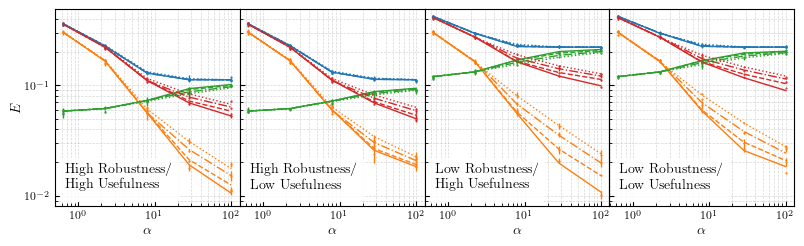

In [15]:
IMG_DIRECTORY = "./Assets/feature_combination_sweeps_fgm"
if not os.path.exists(IMG_DIRECTORY):
    os.makedirs(IMG_DIRECTORY)


def save_plot(fig, name, formats=["pdf","jpg"], date=False) -> None:
    current_date = datetime.datetime.now().strftime("%Y-%m-%d")
    for f in formats:        
        path = "{}".format(name) + "_{}".format(current_date) + "." + f
        if not date:
            path = "{}".format(name) + "." + f
        fig.savefig(            
            os.path.join(IMG_DIRECTORY, path),
            format=f,
        )


def set_size(width, fraction=1, subplots=(1, 1)):
    if width == "thesis":
        width_pt = 426.79135
    elif width == "beamer":
        width_pt = 307.28987
    else:
        width_pt = width

    fig_width_pt = width_pt * fraction
    inches_per_pt = 1 / 72.27

    golden_ratio = (5**0.5 - 1) / 2

    fig_width_in = fig_width_pt * inches_per_pt
    fig_height_in = fig_width_in * (golden_ratio) * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


plt.style.use("latex_ready.mplstyle")

multiplier = 1.25
width = multiplier * 487.8225
tuple_size = set_size(width, subplots=(1,2))
tuple_size = (8.5,2.4)


second_multiplier = 0.7


fig, axes = plt.subplots(
    nrows=1,
    ncols=4,
    sharex=True,
    sharey=True,
    figsize=( tuple_size[0], tuple_size[1]),
    gridspec_kw={"hspace": 0,"wspace": 0},
)


# ICML adjustments
fig.subplots_adjust(left=0.12)
fig.subplots_adjust(bottom=0.08)
fig.subplots_adjust(top=0.9)
fig.subplots_adjust(right=0.99)
# plt.subplots_adjust(bottom=0.20)

# log the figure size
print("Figure size: ", fig.get_size_inches())




axes = axes.flatten()

# Create a custom legend
legend_elements = [Line2D([0], [0], color='blue', label='Line 1'),
                   Line2D([0], [0], color='orange', label='Line 2')]
custom_legend = []




for dm_idx, data_model_name in enumerate(data_models):

    axs = axes[dm_idx]


    linestyles = ["solid", "dashed", "dashdot", "dotted"]


    for idx, epsilon in enumerate(epsilons):

        print("Epsilon: ", epsilon)


        df_filtered = df.filter(pl.col("data_model_name") == data_model_name, pl.col("epsilon") == epsilon)
        df_filtered = df_filtered.sort(by="alpha")


        adversarial_error = df_filtered["adversarial_generalization_errors"]
        generalization_error = df_filtered["generalization_error"]
        fair_error = df_filtered["fair_error"]
        boundary_error = df_filtered["boundary_errors"]

        adversarial_error_erm = df_filtered["adversarial_generalization_errors_erm"]
        generalization_error_erm = df_filtered["generalization_error_erm"]
        fair_error_erm = df_filtered["fair_adversarial_errors"] 
        boundary_error_erm = df_filtered["boundary_errors_erm"]

        rho = df_filtered["ρ"][0]
        tau = df_filtered["tau"][0]

        adversarial_error_erm_std = df_filtered["adversarial_generalization_errors_std_erm"]
        generalization_error_erm_std = df_filtered["generalization_error_erm_std"]
        fair_error_erm_std = df_filtered["fair_adversarial_errors_std"]
        boundary_error_erm_std = df_filtered["boundary_errors_std_erm"]

        if dm_idx == 0:
            custom_legend.append(Line2D([0],[0],color="C0", linestyle=linestyles[idx], label=r"$E_{{\mathrm{{adv}}}}, \varepsilon_t={}$".format(epsilon)))
            custom_legend.append(Line2D([0],[0],color="C1", linestyle=linestyles[idx], label=r"$E_{{\mathrm{{gen}}}}, \varepsilon_t={}$".format(epsilon)))
            custom_legend.append(Line2D([0],[0],color="C2", linestyle=linestyles[idx], label=r"$E_{{\mathrm{{bound}}}}, \varepsilon_t={}$".format(epsilon)))
            custom_legend.append(Line2D([0],[0],color="C3", linestyle=linestyles[idx], label=r"$E_{{\mathrm{{CP}}}}, \varepsilon_t={}$".format(epsilon)))
        


        adversarial_lines = axs.plot(alphas, adversarial_error, linestyle=linestyles[idx],color="C0")
        axs.plot(alphas, generalization_error, linestyle=linestyles[idx],color="C1")        
        axs.plot(alphas, boundary_error,linestyle=linestyles[idx], color="C2")
        axs.plot(alphas, fair_error, linestyle=linestyles[idx], color="C3")
        

        def integrand(xi):
            return erfc(-np.sqrt(rho)/tau * xi * (1/np.sqrt(2))) * np.exp(-xi**2 / 2) / np.sqrt(2*np.pi)
        
        psi_i = 0.5
        if dm_idx > 1:
            psi_i = 2

        axs.errorbar(
            alphas,
            adversarial_error_erm,
            yerr=adversarial_error_erm_std,
            fmt=".",
            markersize=1,
            color="C0"
        )
        axs.errorbar(
            alphas,
            generalization_error_erm,
            yerr=generalization_error_erm_std,
            fmt=".",
            markersize=1,
            color="C1"
        )
        axs.errorbar(
            alphas,
            boundary_error_erm,
            yerr=boundary_error_erm_std,
            fmt=".",
            markersize=1,
            color="C2"
        )
        axs.errorbar(
            alphas,
            fair_error_erm,
            yerr=fair_error_erm_std,
            fmt=".",
            markersize=1,
            color="C3"
        )


    axs.set_xscale("log")
    axs.set_yscale("log")


    if dm_idx  == 0:
        axs.set_ylabel(r"$E$", labelpad=2.0)


    axs.set_xlabel(r"$\alpha$", labelpad=2.0)
    axs.grid(which="both", axis="both", alpha=0.5)
    axs.legend(title=map_data_model_name[data_model_name].replace("/","/\n"), loc="lower left")

    # Set the major ticks to face inwards
    axs.tick_params(axis='both', which='major', direction='in')

    # Set the minor ticks to face inwards
    axs.tick_params(axis='both', which='minor', direction='in')

    axs.set_ylim([8e-3, 4.9e-1])


error_legend = []

error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{adv}}$",color="C0"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{gen}}$",color="C1"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{bound}}$",color="C2"))

epsilon_legend = []

for idx, epsilon in enumerate(epsilons):
    epsilon_legend.append(Line2D([0],[0],color="black", linestyle=linestyles[idx], label=r"$\varepsilon_t={}$".format(epsilons[idx]))) 

custom_legend = []

# mix the two legends
for idx in range(len(error_legend)):
    custom_legend.append(error_legend[idx])
    custom_legend.append(epsilon_legend[idx])

# # Place the legend at the bottom of the figure
# fig.legend(handles=custom_legend, loc='upper center', ncol=4)

save = True
if save:
    save_plot(
        fig,
        "feature_combinations_alpha_sweep",
    )

plt.show() 

Figure size:  [0.85 1.32]


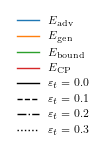

In [16]:
error_legend = []

error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{adv}}$",color="C0"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{gen}}$",color="C1"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{bound}}$",color="C2"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{CP}}$",color="C3"))


epsilon_legend = []

for idx, epsilon in enumerate(epsilons):
    epsilon_legend.append(Line2D([0],[0],color="black", linestyle=linestyles[idx], label=r"$\varepsilon_t={}$".format(epsilons[idx]))) 

custom_legend = error_legend + epsilon_legend

# save the legend separately, put the custom legend into a figure
figlegend = plt.figure(figsize=( 0.1 * tuple_size[0],0.55 *tuple_size[1]))
plt.style.use("latex_ready.mplstyle")
legend_ax = figlegend.add_axes([0, 0, 1, 1])
legend_ax.axis('off') # Turn off the axes for the legend figure

# print figsize
print("Figure size: ", figlegend.get_size_inches())

figlegend.legend(
    handles=custom_legend,
    handlelength=2,
    loc="center",
    ncol=1,
)

figlegend.savefig(
    os.path.join(IMG_DIRECTORY, "legend.pdf"),
    format="pdf",
    # bbox_inches="tight",
)


plt.show()

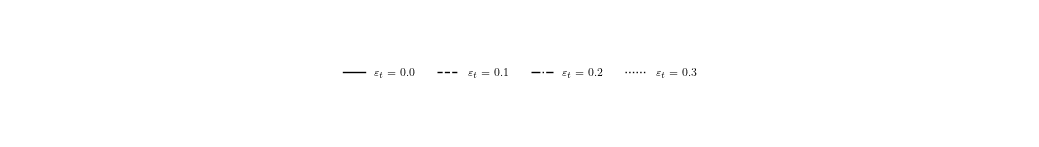

In [17]:
# save the legend separately, put the custom legend into a figure
figlegend = plt.figure(figsize=( 1.2 * tuple_size[0],0.15 * tuple_size[0]))
plt.style.use("latex_ready.mplstyle")
legend_ax = figlegend.add_axes([0, 0, 1, 1])
legend_ax.axis('off')  # Turn off the axes for the legend figure

figlegend.legend(
    handles=epsilon_legend,
    handlelength=2,
    loc="center",
    ncol=5,
)

figlegend.savefig(
    os.path.join(IMG_DIRECTORY, "feature_combinations_alpha_sweep_legend_epsilon.pdf"),
    format="pdf",
    # bbox_inches="tight",
)


plt.show()